## Loan Approval Prediction


#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem statement
- This project analyzes how loan approval decisions are affected by various factors such as income, credit score, assets, education, employment status, and loan characteristics.


### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/architsharma01/loan-approval-prediction-dataset
- The data consists of 13 columns including loan status (target variable)

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame

In [44]:
df = pd.read_csv('data/stud.csv')

#### Show Top 5 Records

In [45]:
df.head()

loan_id   no_of_dependents      education  self_employed   income_annum  \
0        1                  2       Graduate             No        9600000   
1        2                  0   Not Graduate            Yes        4100000   
2        3                  3       Graduate             No        9100000   
3        4                  3       Graduate             No        8200000   
4        5                  5   Not Graduate            Yes        9800000   

    loan_amount   loan_term   cibil_score   residential_assets_value  \
0      29900000          12           778                    2400000   
1      12200000           8           417                    2700000   
2      29700000          20           506                    7100000   
3      30700000           8           467                   18200000   
4      24200000          20           382                   12400000   

    commercial_assets_value   luxury_assets_value   bank_asset_value  \
0                  17600000              22700000            8000000   
1                   2200000               8800000            3300000   
2                   4500000              33300000           12800000   
3                   3300000              23300000            7900000   
4                   8200000              29400000            5000000   

   loan_status  
0     Approved  
1     Rejected  
2     Rejected  
3     Rejected  
4     Rejected

#### Shape of the dataset

In [46]:
df.shape

(4269, 13)

### 2.2 Dataset information

- loan_id: Unique identifier for each loan application
- no_of_dependents: Number of dependents the applicant has
- education: Education level (Graduate/Not Graduate)
- self_employed: Self-employment status (Yes/No)
- income_annum: Annual income of applicant
- loan_amount: Loan amount requested
- loan_term: Loan term in months
- cibil_score: Credit score of applicant
- residential_assets_value: Value of residential assets
- commercial_assets_value: Value of commercial assets
- luxury_assets_value: Value of luxury assets
- bank_asset_value: Value of bank assets
- loan_status: Target variable (Approved/Rejected)

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing values

In [47]:
df.isna().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

#### There are no missing values in the data set

### 3.2 Check Duplicates

In [48]:
df.duplicated().sum()

np.int64(0)

#### There are no duplicates  values in the data set

### 3.3 Check data types

In [49]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


### 3.4 Checking the number of unique values of each column

In [50]:
df.nunique()

loan_id                      4269
 no_of_dependents               6
 education                      2
 self_employed                  2
 income_annum                  98
 loan_amount                  378
 loan_term                     10
 cibil_score                  601
 residential_assets_value     278
 commercial_assets_value      188
 luxury_assets_value          379
 bank_asset_value             146
 loan_status                    2
dtype: int64

### 3.5 Check statistics of data set

In [92]:
# Strip spaces and standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
# Remove leading/trailing spaces and standardize capitalization
df['loan_status'] = df['loan_status'].str.strip().str.title()       # 'Approved' / 'Rejected'
df['self_employed'] = df['self_employed'].str.strip().str.title()   # 'Yes' / 'No'
df['education'] = df['education'].str.strip().str.title()        # 'Graduate' / 'Not Graduate'

# Check counts
print(df['loan_status'].value_counts())
print(df['self_employed'].value_counts())
print(df['education'].value_counts())
yes_self = df[df['self_employed']=='Yes']
no_self = df[df['self_employed']=='No']

print(yes_self['loan_status'].unique())  # Should now show ['Approved', 'Rejected']
print(no_self['loan_status'].unique())   # Should now show ['Approved', 'Rejected']
print(df.columns)

df.describe()


loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64
self_employed
Yes    2150
No     2119
Name: count, dtype: int64
education
Graduate        2144
Not Graduate    2125
Name: count, dtype: int64
['Rejected' 'Approved']
['Approved' 'Rejected']
Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status',
       'total_assets'],
      dtype='object')


loan_id  no_of_dependents  income_annum   loan_amount    loan_term  \
count  4269.000000       4269.000000  4.269000e+03  4.269000e+03  4269.000000   
mean   2135.000000          2.498712  5.059124e+06  1.513345e+07    10.900445   
std    1232.498479          1.695910  2.806840e+06  9.043363e+06     5.709187   
min       1.000000          0.000000  2.000000e+05  3.000000e+05     2.000000   
25%    1068.000000          1.000000  2.700000e+06  7.700000e+06     6.000000   
50%    2135.000000          3.000000  5.100000e+06  1.450000e+07    10.000000   
75%    3202.000000          4.000000  7.500000e+06  2.150000e+07    16.000000   
max    4269.000000          5.000000  9.900000e+06  3.950000e+07    20.000000   

       cibil_score  residential_assets_value  commercial_assets_value  \
count  4269.000000              4.269000e+03             4.269000e+03   
mean    599.936051              7.472617e+06             4.973155e+06   
std     172.430401              6.503637e+06             4.388966e+06   
min     300.000000             -1.000000e+05             0.000000e+00   
25%     453.000000              2.200000e+06             1.300000e+06   
50%     600.000000              5.600000e+06             3.700000e+06   
75%     748.000000              1.130000e+07             7.600000e+06   
max     900.000000              2.910000e+07             1.940000e+07   

       luxury_assets_value  bank_asset_value  total_assets  
count         4.269000e+03      4.269000e+03  4.269000e+03  
mean          1.512631e+07      4.976692e+06  3.254877e+07  
std           9.103754e+06      3.250185e+06  1.950656e+07  
min           3.000000e+05      0.000000e+00  4.000000e+05  
25%           7.500000e+06      2.300000e+06  1.630000e+07  
50%           1.460000e+07      4.600000e+06  3.150000e+07  
75%           2.170000e+07      7.100000e+06  4.720000e+07  
max           3.920000e+07      1.470000e+07  9.070000e+07

#### Insight
- Income, loans, and assets have wide ranges, reflecting a diverse applicant pool.
- Loan amounts and luxury assets are highly skewed, some applicants request very high loans and own extremely high-value assets.
- Credit scores show wide variation, indicating applicants with both low and excellent credit histories.
- No_of_dependents has moderate variation, most applicants have 2–3 dependents.
- Some data anomalies exist: e.g., negative residential assets (-100k), which may need cleaning before modeling.

### 3.7 Exploring Data

In [52]:
df.head()

loan_id  no_of_dependents      education self_employed  income_annum  \
0        1                 2       Graduate            No       9600000   
1        2                 0   Not Graduate           Yes       4100000   
2        3                 3       Graduate            No       9100000   
3        4                 3       Graduate            No       8200000   
4        5                 5   Not Graduate           Yes       9800000   

   loan_amount  loan_term  cibil_score  residential_assets_value  \
0     29900000         12          778                   2400000   
1     12200000          8          417                   2700000   
2     29700000         20          506                   7100000   
3     30700000          8          467                  18200000   
4     24200000         20          382                  12400000   

   commercial_assets_value  luxury_assets_value  bank_asset_value loan_status  
0                 17600000             22700000           8000000    Approved  
1                  2200000              8800000           3300000    Rejected  
2                  4500000             33300000          12800000    Rejected  
3                  3300000             23300000           7900000    Rejected  
4                  8200000             29400000           5000000    Rejected

In [53]:
print(df.columns)

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')


In [54]:
# Print unique categories for categorical variables
print("Categories in 'education' variable:       ", end=" ")
print(df['education'].unique())

print("Categories in 'self_employed' variable:  ", end=" ")
print(df['self_employed'].unique())

print("Categories in 'loan_status' variable:    ", end=" ")
print(df['loan_status'].unique())


Categories in 'education' variable:        [' Graduate' ' Not Graduate']
Categories in 'self_employed' variable:   [' No' ' Yes']
Categories in 'loan_status' variable:     [' Approved' ' Rejected']


In [55]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 10 numerical features : ['loan_id', 'no_of_dependents', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']

We have 3 categorical features : ['education', 'self_employed', 'loan_status']


In [56]:
df.head(2)

loan_id  no_of_dependents      education self_employed  income_annum  \
0        1                 2       Graduate            No       9600000   
1        2                 0   Not Graduate           Yes       4100000   

   loan_amount  loan_term  cibil_score  residential_assets_value  \
0     29900000         12          778                   2400000   
1     12200000          8          417                   2700000   

   commercial_assets_value  luxury_assets_value  bank_asset_value loan_status  
0                 17600000             22700000           8000000    Approved  
1                  2200000              8800000           3300000    Rejected

### 3.8 Adding columns for "Total Score" and "Average"

In [57]:
df['total_assets'] = df['residential_assets_value'] + df['commercial_assets_value'] + df['luxury_assets_value'] + df['bank_asset_value']
df.head(2)

loan_id  no_of_dependents      education self_employed  income_annum  \
0        1                 2       Graduate            No       9600000   
1        2                 0   Not Graduate           Yes       4100000   

   loan_amount  loan_term  cibil_score  residential_assets_value  \
0     29900000         12          778                   2400000   
1     12200000          8          417                   2700000   

   commercial_assets_value  luxury_assets_value  bank_asset_value loan_status  \
0                 17600000             22700000           8000000    Approved   
1                  2200000              8800000           3300000    Rejected   

   total_assets  
0      50700000  
1      17000000

In [58]:
# If you have already created 'total_assets'
max_income_count = df[df['income_annum'] == df['income_annum'].max()]['loan_id'].count()
max_cibil_count = df[df['cibil_score'] == df['cibil_score'].max()]['loan_id'].count()
max_assets_count = df[df['total_assets'] == df['total_assets'].max()]['loan_id'].count()
max_residential_count = df[df['residential_assets_value'] == df['residential_assets_value'].max()]['loan_id'].count()
max_commercial_count  = df[df['commercial_assets_value'] == df['commercial_assets_value'].max()]['loan_id'].count()
max_luxury_count  = df[df['luxury_assets_value'] == df['luxury_assets_value'].max()]['loan_id'].count()
max_bank_count  = df[df['bank_asset_value'] == df['bank_asset_value'].max()]['loan_id'].count()

print(f'Number of applicants with maximum income: {max_income_count}')
print(f'Number of applicants with maximum CIBIL score: {max_cibil_count}')
print(f'Number of applicants with maximum residential assets: {max_residential_count}')
print(f'Number of applicants with maximum commercial assets: {max_commercial_count}')
print(f'Number of applicants with maximum luxury assets: {max_luxury_count}')
print(f'Number of applicants with maximum bank assets: {max_bank_count}')
print(f'Number of applicants with maximum total assets: {max_assets_count}')

Number of applicants with maximum income: 35
Number of applicants with maximum CIBIL score: 6
Number of applicants with maximum residential assets: 1
Number of applicants with maximum commercial assets: 1
Number of applicants with maximum luxury assets: 1
Number of applicants with maximum bank assets: 2
Number of applicants with maximum total assets: 1


In [59]:
# Make sure you have 'total_assets' calculated
df['total_assets'] = df['residential_assets_value'] + df['commercial_assets_value'] + df['luxury_assets_value'] + df['bank_asset_value']

# Count applicants below thresholds
low_income_count = df[df['income_annum'] <= 2000000]['loan_id'].count()
low_cibil_count = df[df['cibil_score'] <= 450]['loan_id'].count()
low_assets_count = df[df['total_assets'] <= 1000000]['loan_id'].count()

print(f'Number of applicants with very low income (<= 2M): {low_income_count}')
print(f'Number of applicants with very low CIBIL score (<= 450): {low_cibil_count}')
print(f'Number of applicants with very low total assets (<= 1M): {low_assets_count}')


Number of applicants with very low income (<= 2M): 809
Number of applicants with very low CIBIL score (<= 450): 1053
Number of applicants with very low total assets (<= 1M): 22


#####  Insights
 - The highest number of applicants with very low values is for CIBIL score (1053 applicants), indicating that a significant portion of applicants have poor credit history.

- A large number of applicants also have very low income (809 applicants), which might affect their loan approval chances.

- Very few applicants have very low total assets (22 applicants), meaning most applicants have some form of assets, even if their income or credit score is low.

- Overall, poor credit history appears to be the most common risk factor among applicants, while total assets are generally less of a limiting factor.

### 4. Exploring Data ( Visualization )
#### 4.1 Visualize average score distribution to make some conclusion. 
- Histogram
- Kernel Distribution Function (KDE)

#### 4.1.1 Histogram & KDE

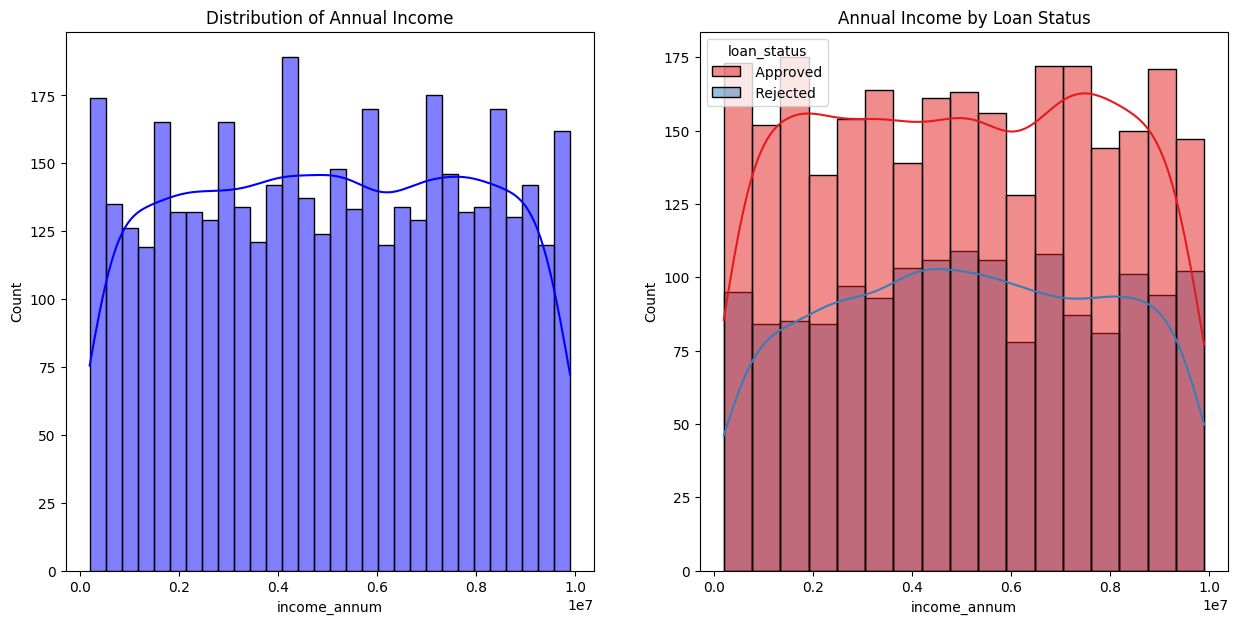

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Distribution of income and comparison by loan status
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# Plot 1: Histogram of annual income
plt.subplot(121)
sns.histplot(data=df, x='income_annum', bins=30, kde=True, color='blue')
plt.title('Distribution of Annual Income')

# Plot 2: Histogram of annual income by loan status
plt.subplot(122)
sns.histplot(data=df, x='income_annum', kde=True, hue='loan_status', palette='Set1')
plt.title('Annual Income by Loan Status')

plt.show()


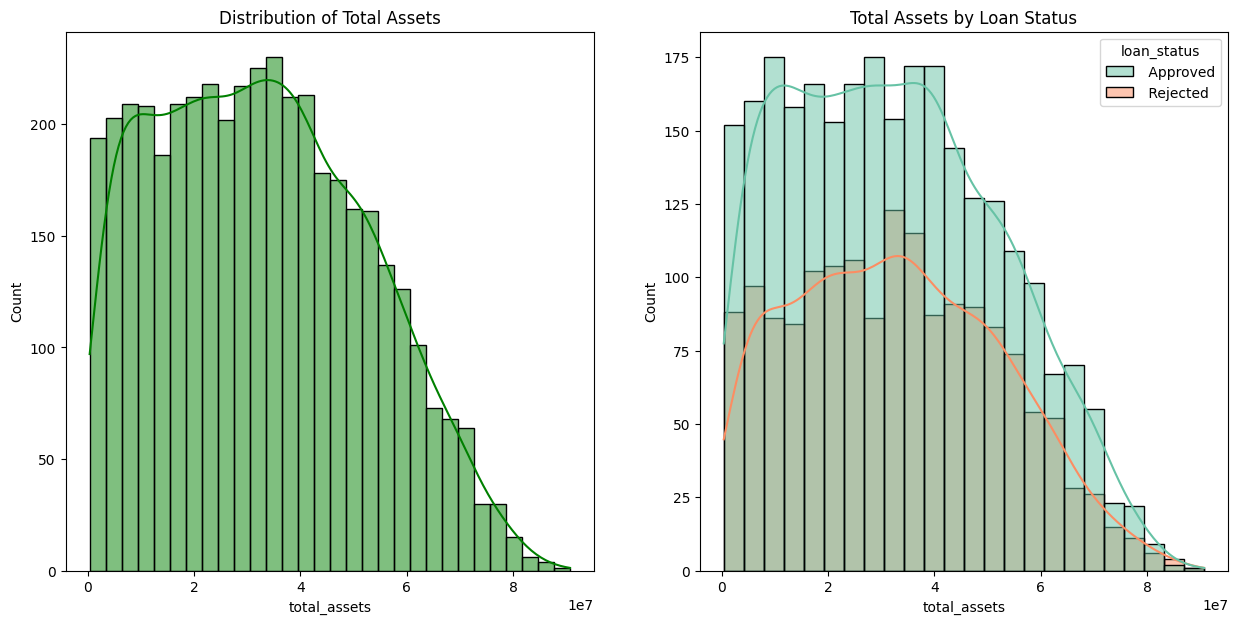

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# Plot 1: Histogram of total assets
plt.subplot(121)
sns.histplot(data=df, x='total_assets', bins=30, kde=True, color='green')
plt.title('Distribution of Total Assets')

# Plot 2: Histogram of total assets by loan status
plt.subplot(122)
sns.histplot(data=df, x='total_assets', kde=True, hue='loan_status', palette='Set2')
plt.title('Total Assets by Loan Status')

plt.show()


#####  Insights
- Applicants with higher total assets are more likely to get their loans approved.
- Graduates tend to have higher average income than non-graduates.
- Applicants who are self-employed generally have more variable total assets compared to those who are not self-employed.
- Applicants with high CIBIL scores are predominantly found in the approved loan category, indicating credit history is a strong factor in approval.

In [67]:
print(df[['residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']].head())

   residential_assets_value  commercial_assets_value  luxury_assets_value  \
0                   2400000                 17600000             22700000   
1                   2700000                  2200000              8800000   
2                   7100000                  4500000             33300000   
3                  18200000                  3300000             23300000   
4                  12400000                  8200000             29400000   

   bank_asset_value  
0           8000000  
1           3300000  
2          12800000  
3           7900000  
4           5000000  


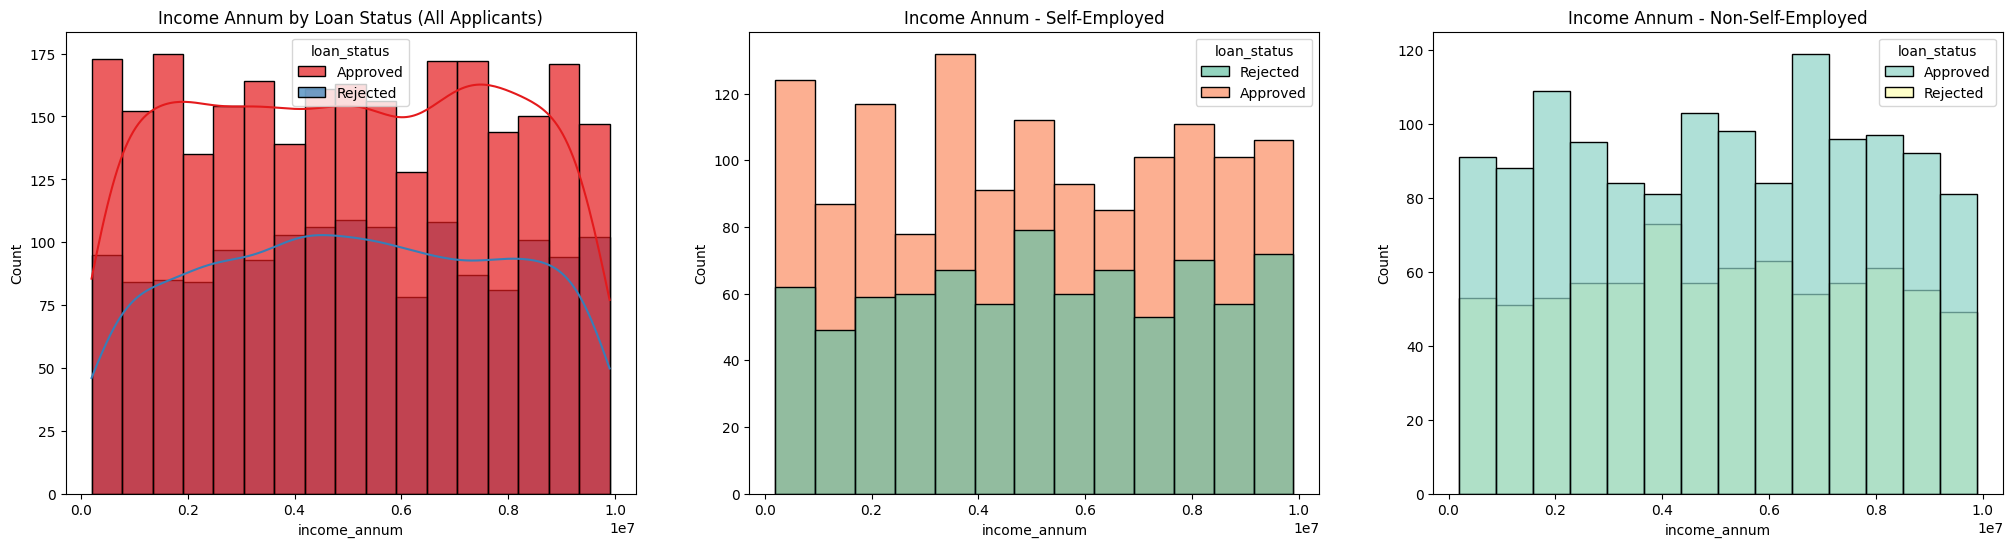

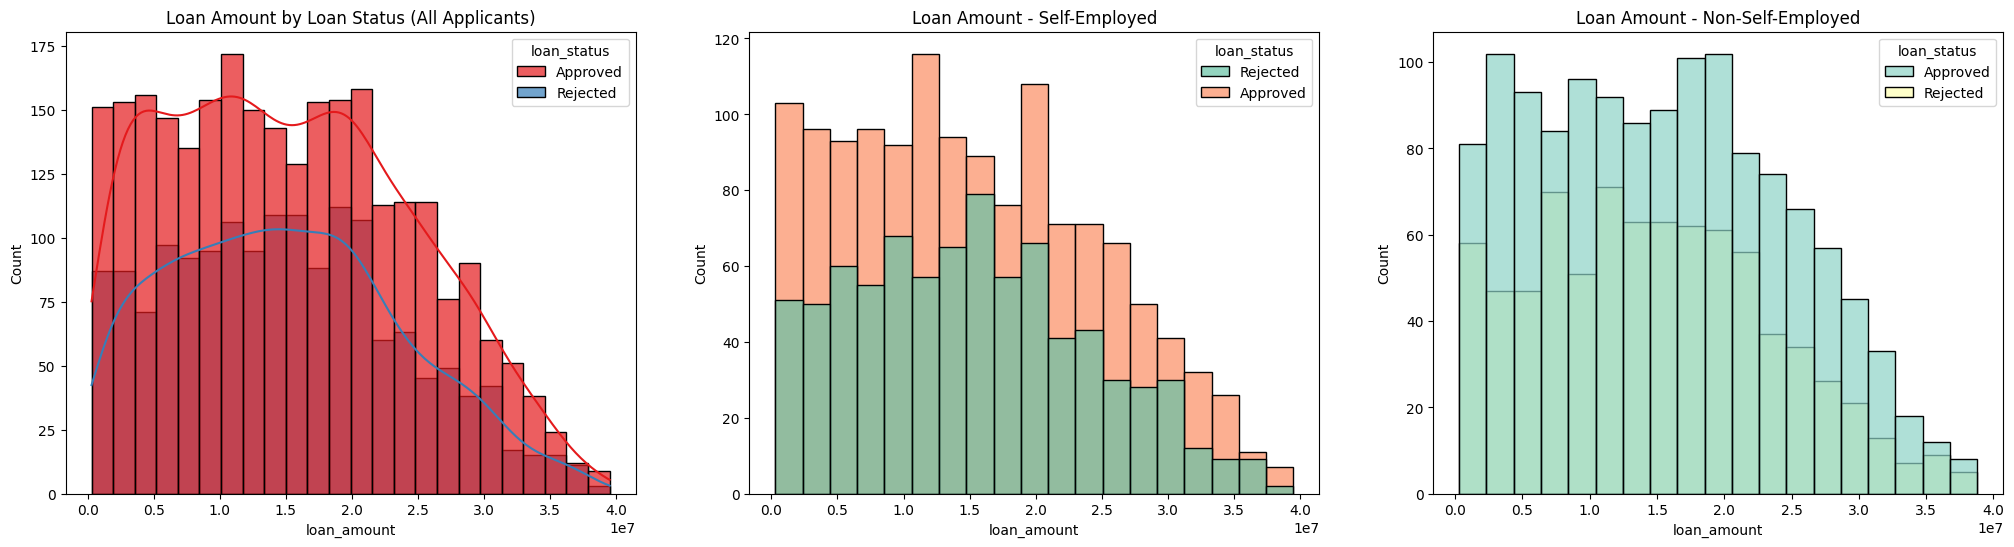

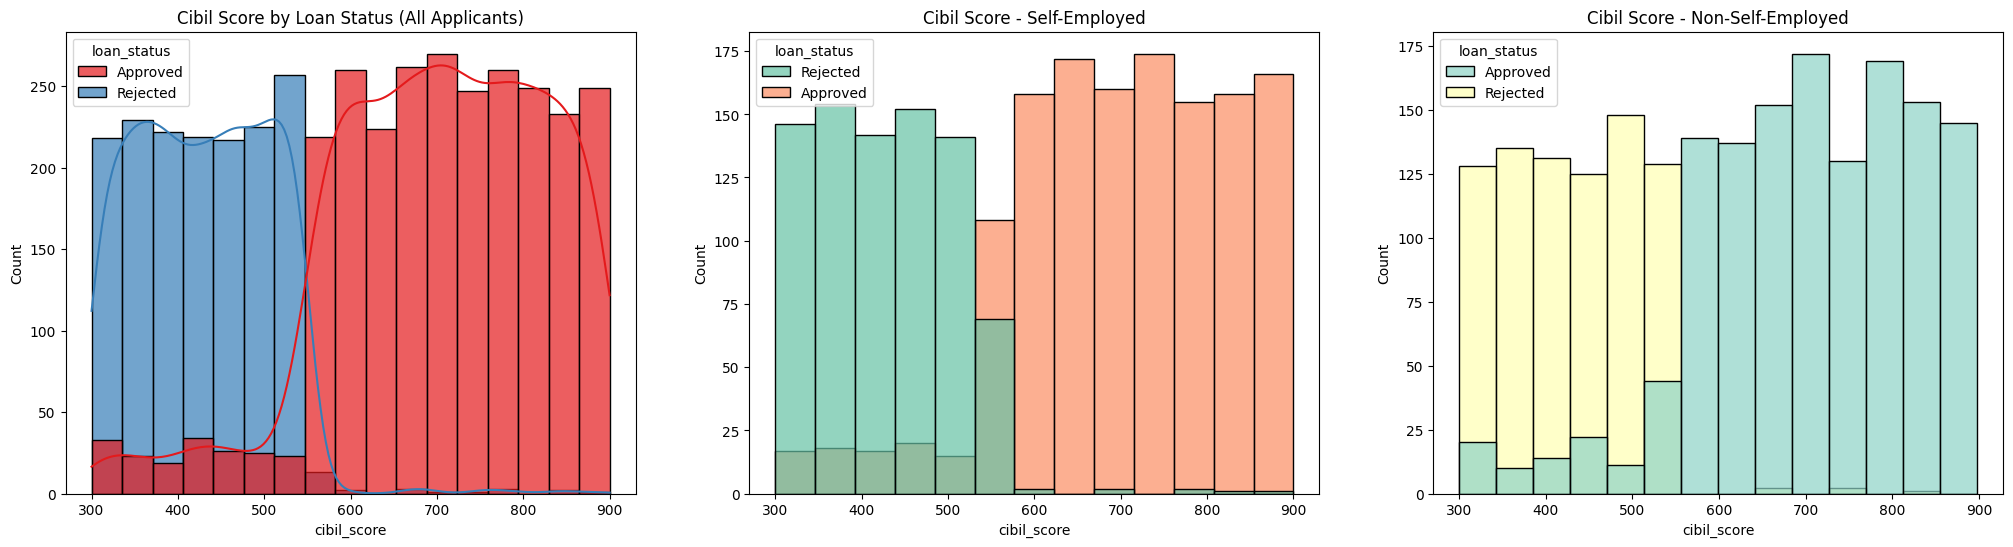

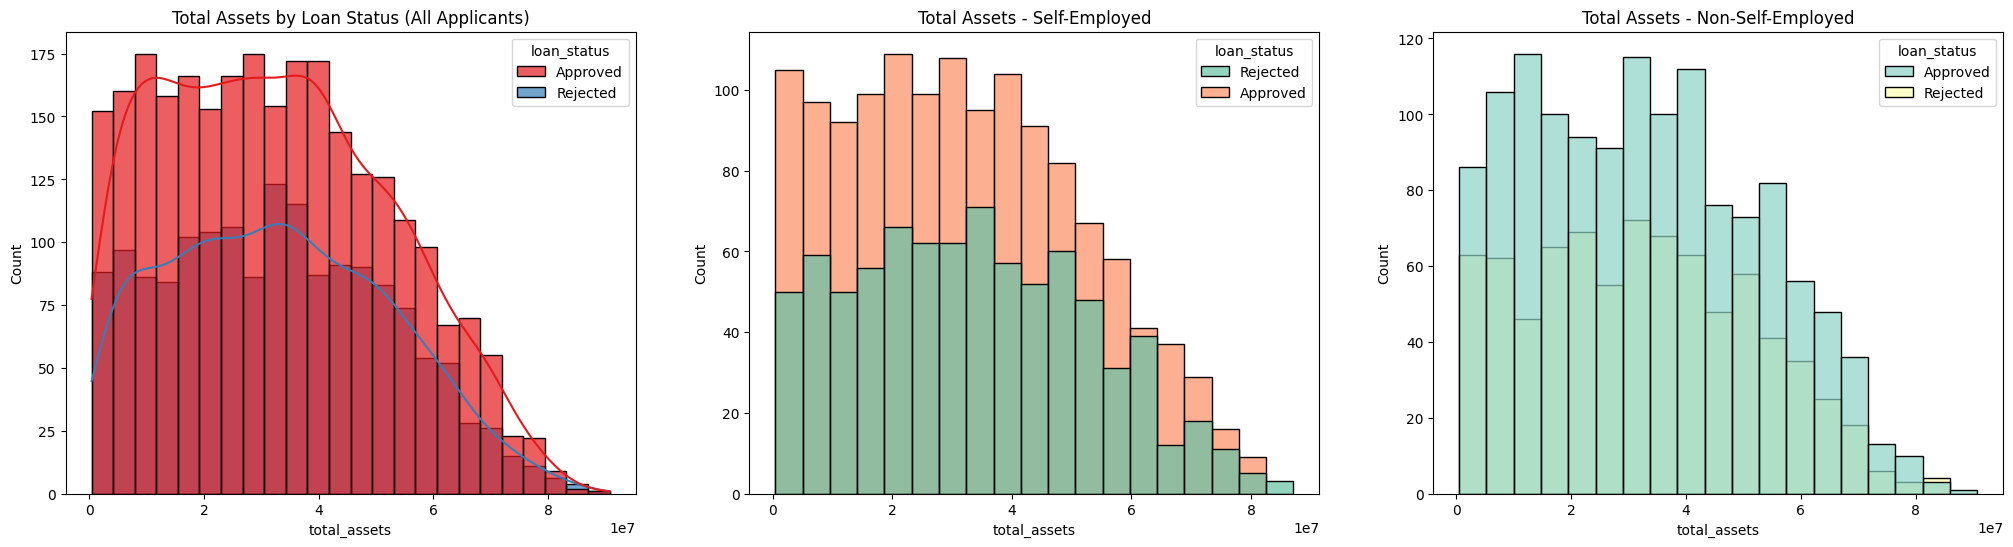

In [76]:
for feature in numeric_features:
    fig, axs = plt.subplots(1, 3, figsize=(25, 6))
    
    # All applicants
    plt.subplot(131)
    sns.histplot(data=df, x=feature, kde=True, hue='loan_status', palette='Set1', alpha=0.7)
    plt.title(f'{feature.replace("_"," ").title()} by Loan Status (All Applicants)')
    
    # Self-employed
    yes_self = df[df['self_employed']=='Yes']
    plt.subplot(132)
    if not yes_self.empty:
        sns.histplot(data=yes_self, x=feature, kde=False, hue='loan_status', palette='Set2', alpha=0.7)
    plt.title(f'{feature.replace("_"," ").title()} - Self-Employed')
    
    # Non-self-employed
    no_self = df[df['self_employed']=='No']
    plt.subplot(133)
    if not no_self.empty:
        sns.histplot(data=no_self, x=feature, kde=False, hue='loan_status', palette='Set3', alpha=0.7)
    plt.title(f'{feature.replace("_"," ").title()} - Non-Self-Employed')
    
    plt.show()


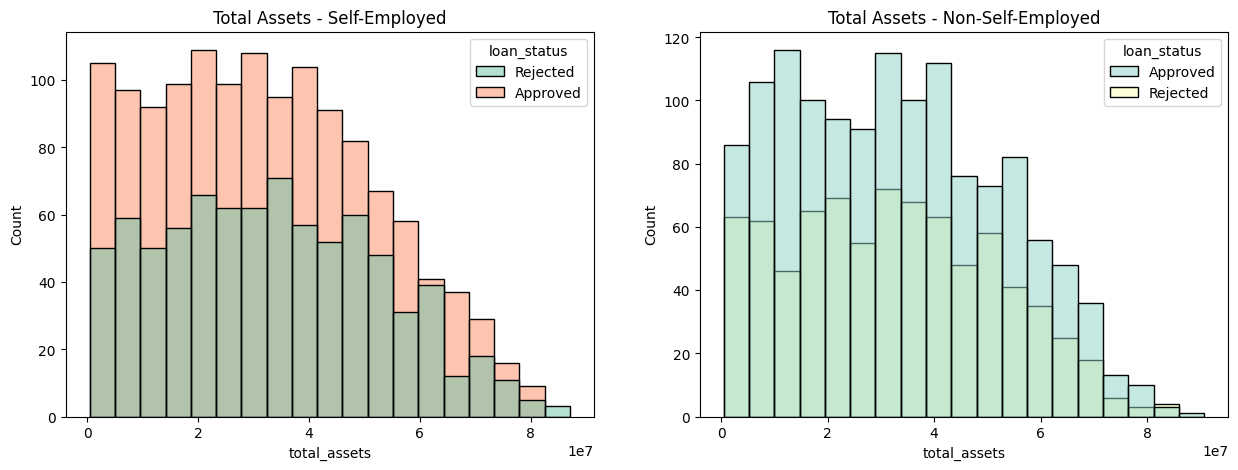

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

yes_self = df[df['self_employed']=='Yes']
no_self = df[df['self_employed']=='No']

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.histplot(data=yes_self, x='total_assets', hue='loan_status', kde=False, palette='Set2')
plt.title('Total Assets - Self-Employed')

plt.subplot(1,2,2)
sns.histplot(data=no_self, x='total_assets', hue='loan_status', kde=False, palette='Set3')
plt.title('Total Assets - Non-Self-Employed')

plt.show()


#####  Insights
- Applicants who are self-employed tend to have a wider distribution of total assets, but loan approval is higher for non-self-employed applicants with moderate assets.
- Higher total assets correlate with a higher chance of loan approval.
- This trend is consistent whether the applicant is self-employed or not, similar to how “standard lunch” consistently helped students perform well in all categories.

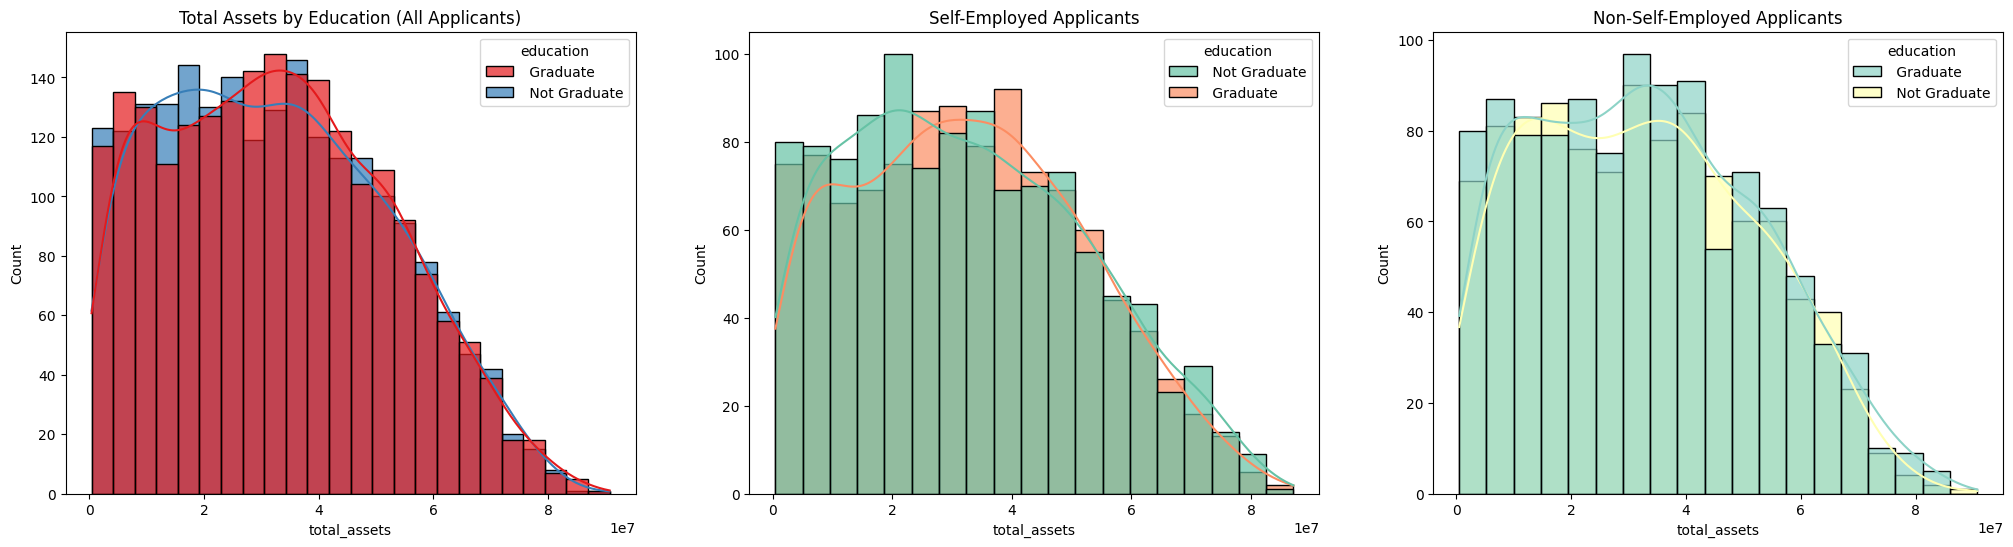

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.subplots(1,3,figsize=(25,6))

# Plot 1: All applicants by education
plt.subplot(131)
sns.histplot(data=df, x='total_assets', kde=True, hue='education', palette='Set1', alpha=0.7)
plt.title('Total Assets by Education (All Applicants)')

# Plot 2: Self-employed applicants by education
plt.subplot(132)
sns.histplot(data=df[df['self_employed']=='Yes'], x='total_assets', kde=True, hue='education', palette='Set2', alpha=0.7)
plt.title('Self-Employed Applicants')

# Plot 3: Non-self-employed applicants by education
plt.subplot(133)
sns.histplot(data=df[df['self_employed']=='No'], x='total_assets', kde=True, hue='education', palette='Set3', alpha=0.7)
plt.title('Non-Self-Employed Applicants')

plt.show()


#####  Insights
- In general, applicant education does not guarantee higher total assets.
- For self-employed applicants, those with Graduate-level education tend to have slightly higher total assets.
- For non-self-employed applicants, there is no clear effect of education on total assets.

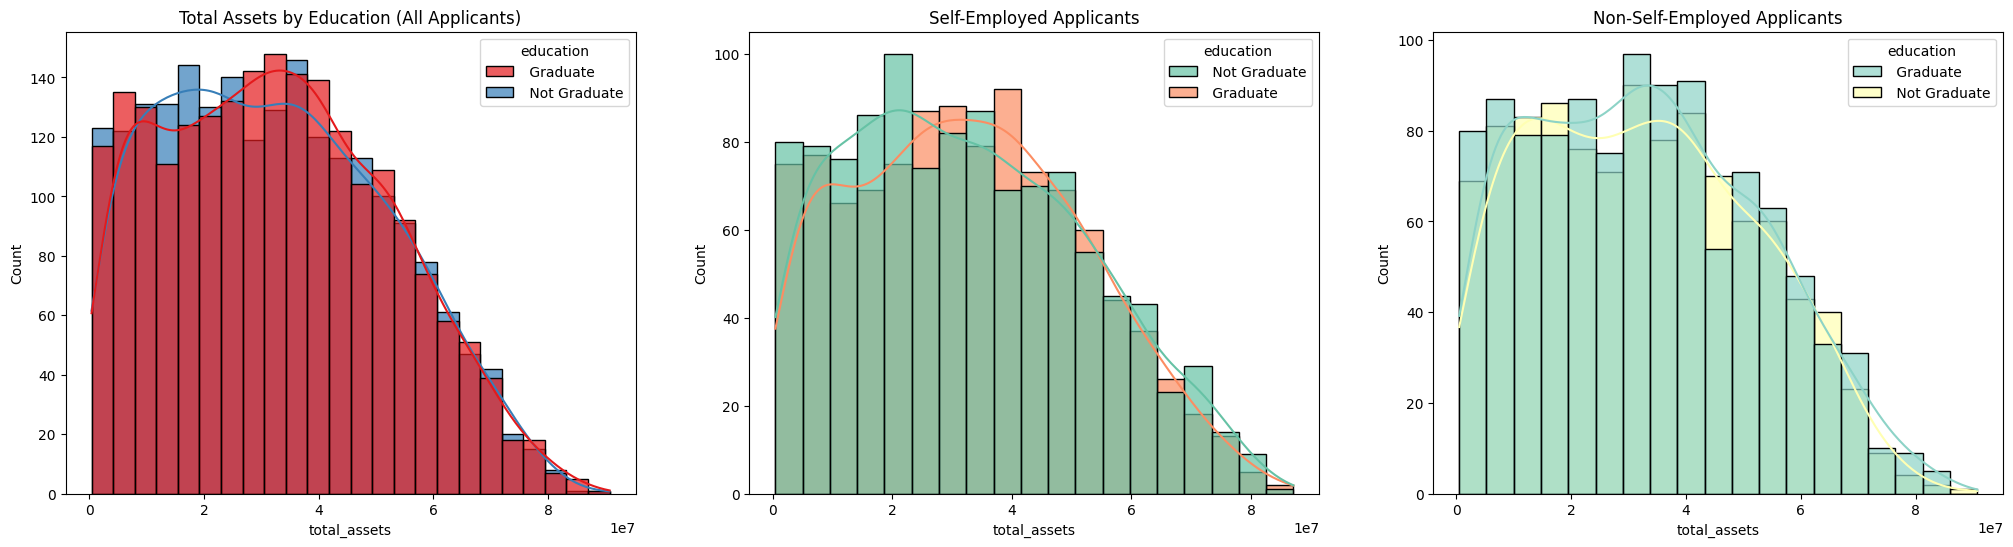

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.subplots(1,3,figsize=(25,6))

# Plot 1: All applicants by education
plt.subplot(131)
sns.histplot(data=df, x='total_assets', kde=True, hue='education', palette='Set1', alpha=0.7)
plt.title('Total Assets by Education (All Applicants)')

# Plot 2: Self-employed applicants by education
plt.subplot(132)
sns.histplot(data=df[df['self_employed']=='Yes'], x='total_assets', kde=True, hue='education', palette='Set2', alpha=0.7)
plt.title('Self-Employed Applicants')

# Plot 3: Non-self-employed applicants by education
plt.subplot(133)
sns.histplot(data=df[df['self_employed']=='No'], x='total_assets', kde=True, hue='education', palette='Set3', alpha=0.7)
plt.title('Non-Self-Employed Applicants')

plt.show()


#####  Insights
- Applicants with “Not Graduate” education tend to have lower total assets.
- This trend is consistent regardless of whether the applicant is self-employed or not.

#### 4.2 Maximumum score of students in all three subjects

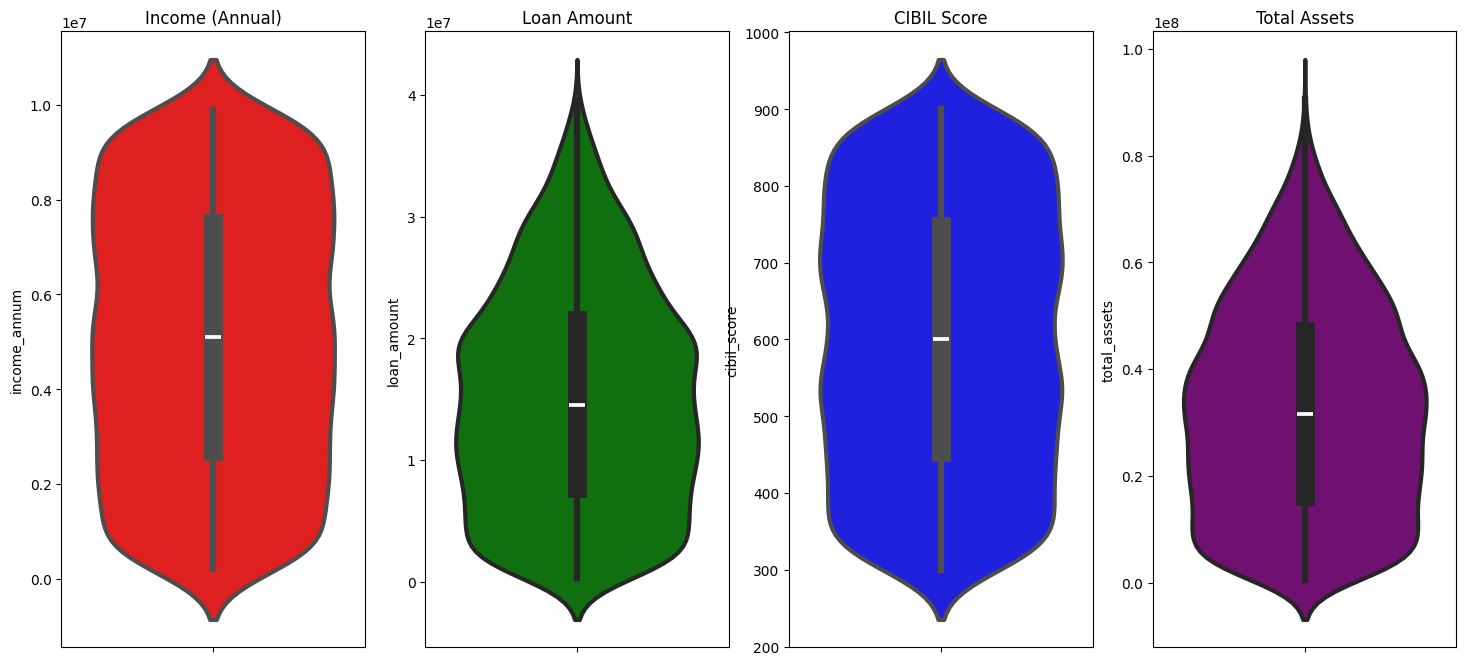

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18,8))

# Plot 1: Income distribution
plt.subplot(1, 4, 1)
plt.title('Income (Annual)')
sns.violinplot(y='income_annum', data=df, color='red', linewidth=3)

# Plot 2: Loan amount distribution
plt.subplot(1, 4, 2)
plt.title('Loan Amount')
sns.violinplot(y='loan_amount', data=df, color='green', linewidth=3)

# Plot 3: CIBIL score distribution
plt.subplot(1, 4, 3)
plt.title('CIBIL Score')
sns.violinplot(y='cibil_score', data=df, color='blue', linewidth=3)

# Plot 4: Total assets distribution
plt.subplot(1, 4, 4)
plt.title('Total Assets')
sns.violinplot(y='total_assets', data=df, color='purple', linewidth=3)

plt.show()


#### Insights
- Most applicants have annual incomes between ~2M–8M, while a smaller portion earns very high incomes.
- Loan amounts are concentrated roughly between 5M–25M, with few extremely large loans.
- CIBIL scores mostly lie between 400–750, indicating moderate to good credit history for most applicants.
- Total assets are concentrated roughly between 10M–50M, with some applicants having very high total assets.

#### 4.3 Multivariate analysis using pieplot

In [81]:
df.head()

loan_id  no_of_dependents      education self_employed  income_annum  \
0        1                 2       Graduate            No       9600000   
1        2                 0   Not Graduate           Yes       4100000   
2        3                 3       Graduate            No       9100000   
3        4                 3       Graduate            No       8200000   
4        5                 5   Not Graduate           Yes       9800000   

   loan_amount  loan_term  cibil_score  residential_assets_value  \
0     29900000         12          778                   2400000   
1     12200000          8          417                   2700000   
2     29700000         20          506                   7100000   
3     30700000          8          467                  18200000   
4     24200000         20          382                  12400000   

   commercial_assets_value  luxury_assets_value  bank_asset_value loan_status  \
0                 17600000             22700000           8000000    Approved   
1                  2200000              8800000           3300000    Rejected   
2                  4500000             33300000          12800000    Rejected   
3                  3300000             23300000           7900000    Rejected   
4                  8200000             29400000           5000000    Rejected   

   total_assets  
0      50700000  
1      17000000  
2      57700000  
3      52700000  
4      55000000

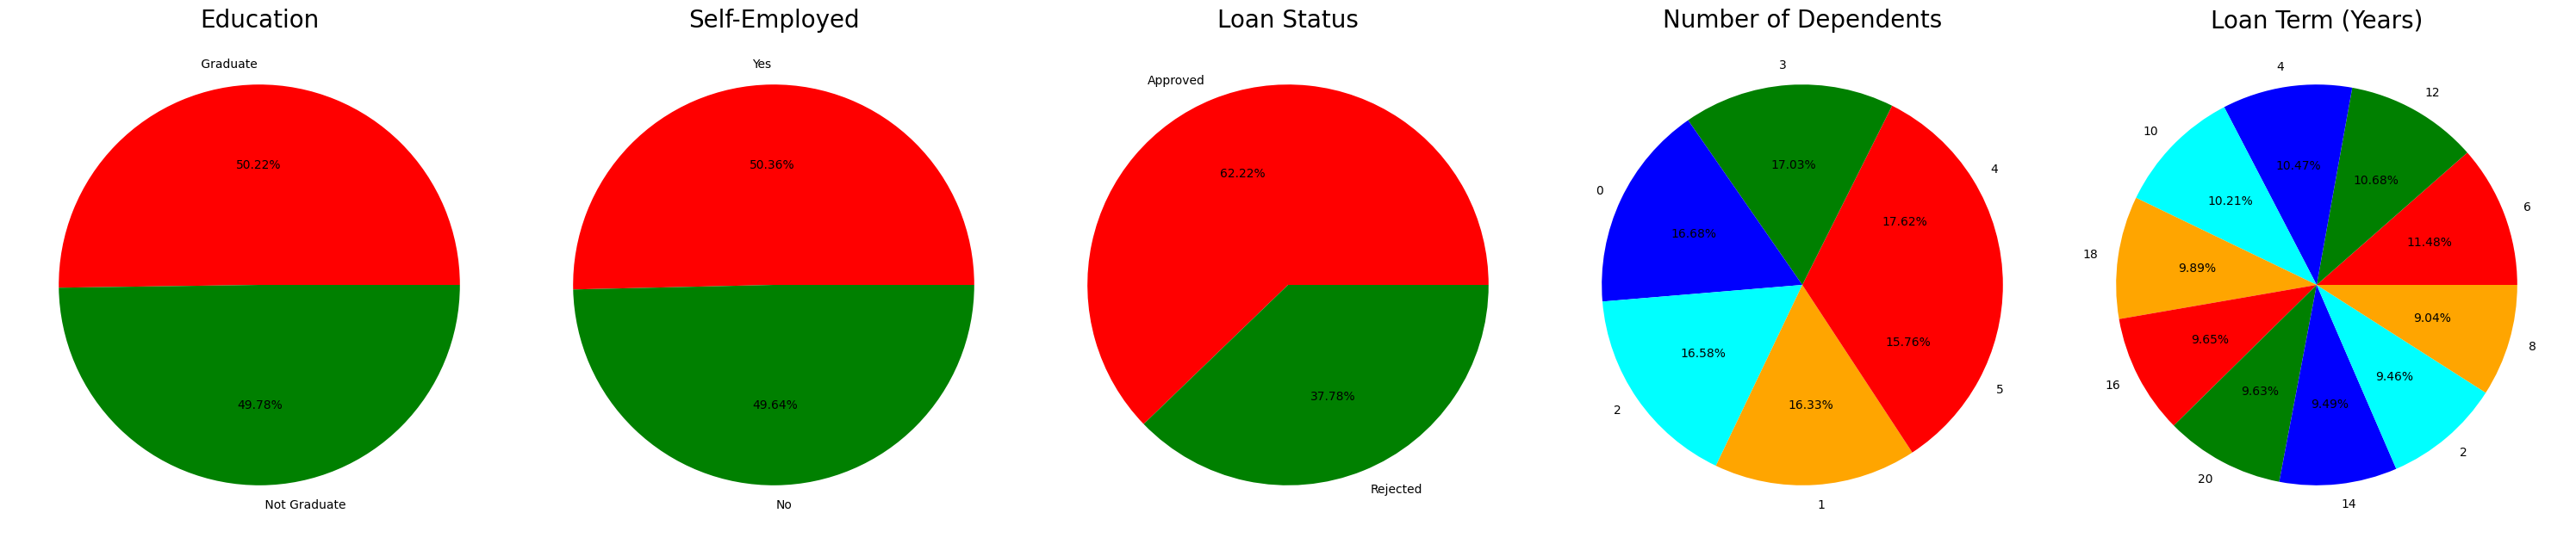

In [82]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (30, 12)

# Pie chart for Education
plt.subplot(1, 5, 1)
size = df['education'].value_counts()
labels = df['education'].value_counts().index  # dynamic labels
colors = ['red', 'green']
plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%')
plt.title('Education', fontsize=20)
plt.axis('off')

# Pie chart for Self-Employment
plt.subplot(1, 5, 2)
size = df['self_employed'].value_counts()
labels = df['self_employed'].value_counts().index
colors = ['red', 'green']
plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%')
plt.title('Self-Employed', fontsize=20)
plt.axis('off')

# Pie chart for Loan Status
plt.subplot(1, 5, 3)
size = df['loan_status'].value_counts()
labels = df['loan_status'].value_counts().index
colors = ['red', 'green']
plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%')
plt.title('Loan Status', fontsize=20)
plt.axis('off')

# Pie chart for Number of Dependents
plt.subplot(1, 5, 4)
size = df['no_of_dependents'].value_counts()
labels = df['no_of_dependents'].value_counts().index
colors = ['red', 'green', 'blue', 'cyan', 'orange']
plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%')
plt.title('Number of Dependents', fontsize=20)
plt.axis('off')

# Pie chart for Loan Term
plt.subplot(1, 5, 5)
size = df['loan_term'].value_counts()
labels = df['loan_term'].value_counts().index
colors = ['red', 'green', 'blue', 'cyan', 'orange']
plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%')
plt.title('Loan Term (Years)', fontsize=20)
plt.axis('off')

plt.tight_layout()
plt.show()

#####  Insights
- The number of Graduates and Non-Graduates is almost equal.
- Roughly half of the applicants are self-employed, and half are not.
- The majority of loans are Approved, while a smaller portion is Rejected.
- Most applicants have 3–4 dependents, with fewer having 0–2 or more than 4 dependents.
- Loan terms are distributed across multiple durations, with 12-year and 6-year terms being slightly more common.

#### 4.4 Feature Wise Visualization
#### 4.4.1 EDUCATION COLUMN
- How is distribution of education ?
- Is education has any impact on loan approval performance ?

#### UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

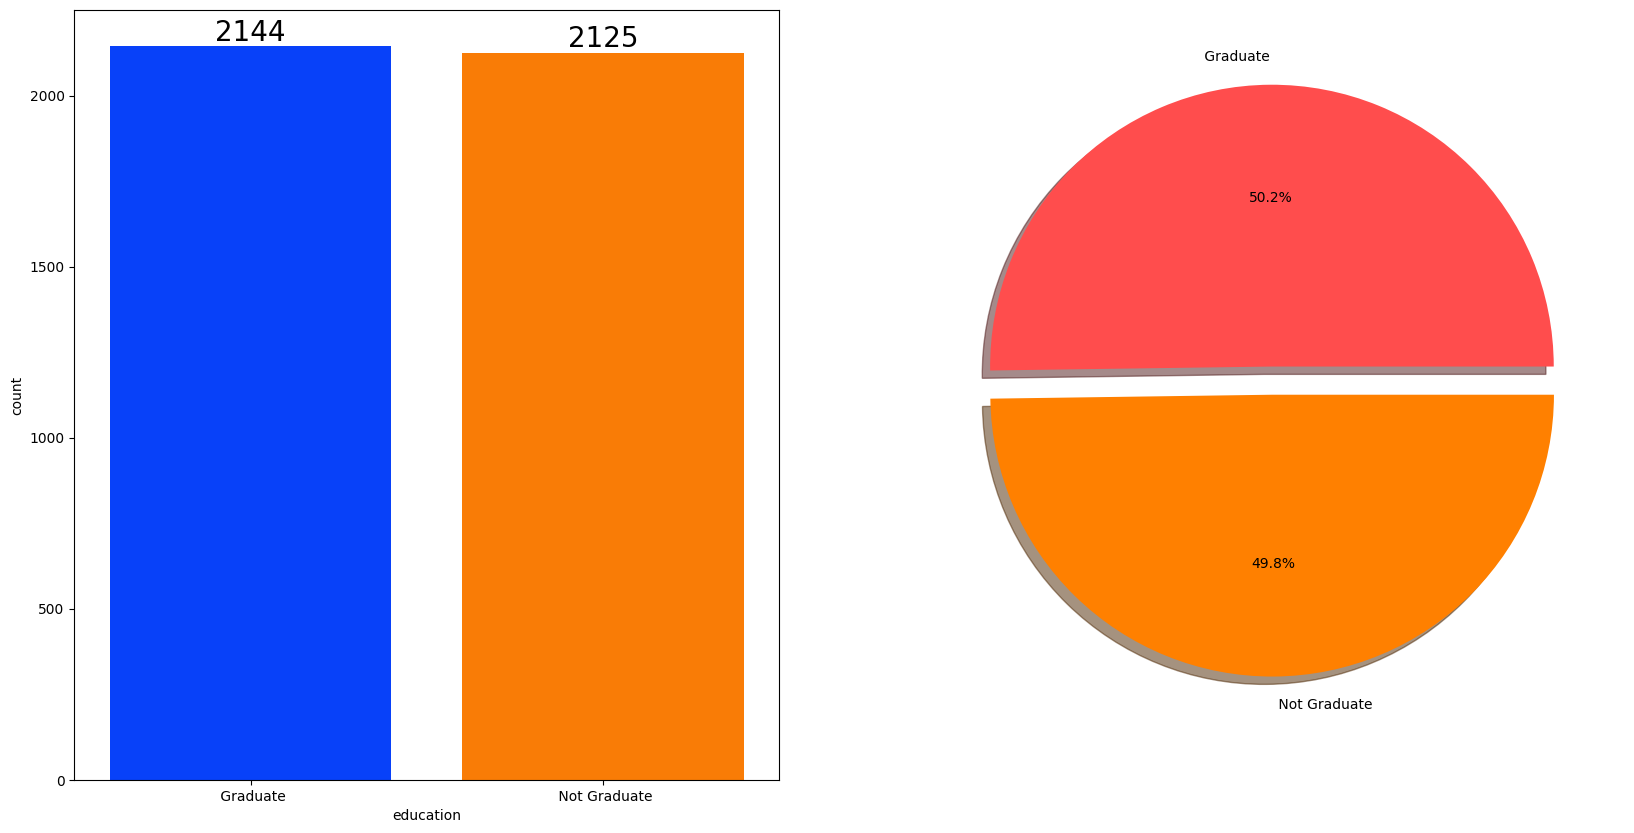

In [83]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['education'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['education'].value_counts(),labels=df['education'].value_counts().index,explode=[0.1,0],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

#### Insights 
- Education has balanced data with female students are 2144 (49.8%) and male students are 2125 (50.2%) 

#### BIVARIATE ANALYSIS ( Is education has any impact on loan approval performance ? ) 

In [84]:
education_group = df.groupby('education').mean(numeric_only=True)
print(education_group)

                  loan_id  no_of_dependents  income_annum   loan_amount  \
education                                                                 
Graduate      2154.061101          2.503265  5.091604e+06  1.522915e+07   
Not Graduate  2115.768471          2.494118  5.026353e+06  1.503689e+07   

              loan_term  cibil_score  residential_assets_value  \
education                                                        
Graduate      10.852612   599.138060              7.543377e+06   
Not Graduate  10.948706   600.741176              7.401224e+06   

              commercial_assets_value  luxury_assets_value  bank_asset_value  \
education                                                                      
Graduate                 4.943610e+06         1.523932e+07      5.007183e+06   
Not Graduate             5.002965e+06         1.501228e+07      4.945929e+06   

              total_assets  
education                   
Graduate      3.273349e+07  
Not Graduate  3.236240e+07

In [90]:
# First, let's check the structure of your DataFrame
print("DataFrame columns:")
print(df.columns.tolist())
print("\n")

# Check the unique values in the education column
print("Unique education values:")
print(df['education'].unique())
print("\n")

# Check if there are any null values
print("Null values in education column:", df['education'].isnull().sum())
print("Null values in income_annum column:", df['income_annum'].isnull().sum())
print("Null values in loan_amount column:", df['loan_amount'].isnull().sum())
print("\n")

# Check the data types
print("Data types:")
print(df[['education', 'income_annum', 'loan_amount']].dtypes)
print("\n")

# Let's see a sample of the data
print("Sample data:")
print(df[['education', 'income_annum', 'loan_amount']].head(10))

DataFrame columns:
['loan_id', 'no_of_dependents', 'education', 'self_employed', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value', 'loan_status', 'total_assets']


Unique education values:
[' Graduate' ' Not Graduate']


Null values in education column: 0
Null values in income_annum column: 0
Null values in loan_amount column: 0


Data types:
education       object
income_annum     int64
loan_amount      int64
dtype: object


Sample data:
       education  income_annum  loan_amount
0       Graduate       9600000     29900000
1   Not Graduate       4100000     12200000
2       Graduate       9100000     29700000
3       Graduate       8200000     30700000
4   Not Graduate       9800000     24200000
5       Graduate       4800000     13500000
6       Graduate       8700000     33000000
7       Graduate       5700000     15000000
8       Graduate        800000      2200000
9   Not Gr

Graduate values: [np.float64(5091604.47761194), np.float64(15229151.119402984)]
Not Graduate values: [np.float64(5026352.94117647), np.float64(15036894.11764706)]


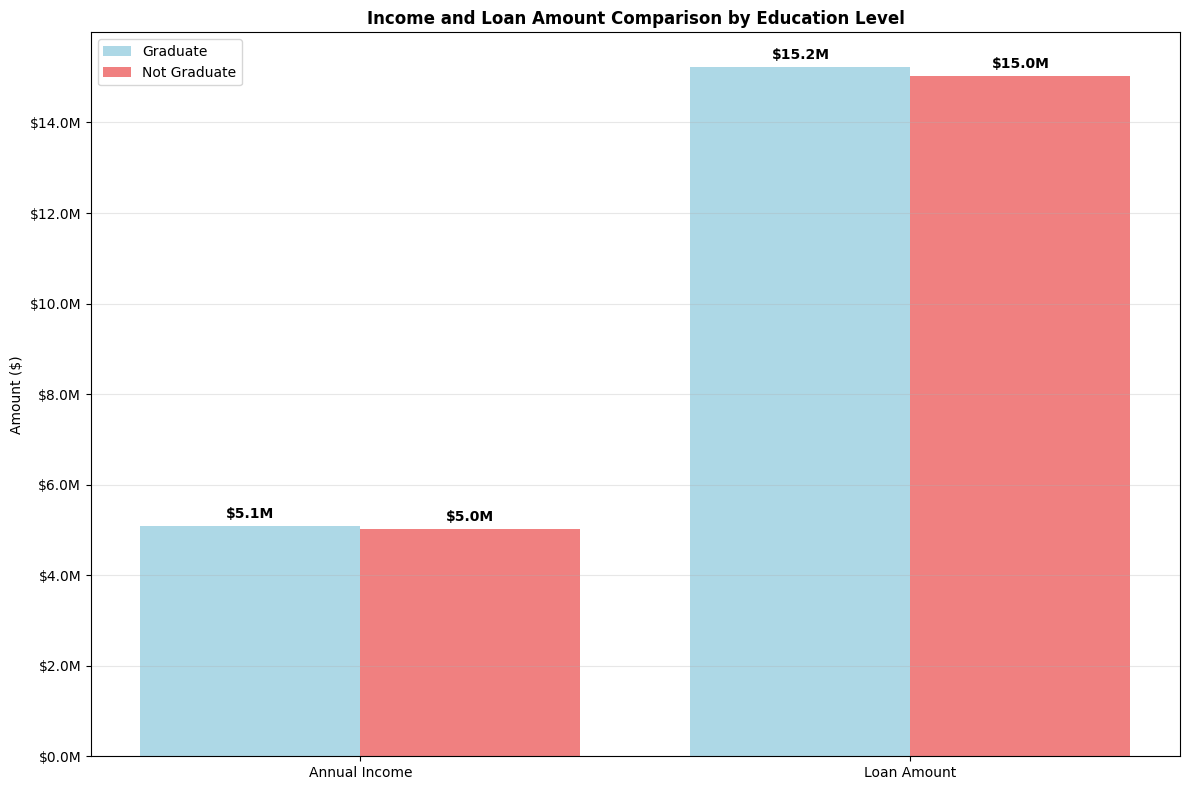

In [93]:
plt.figure(figsize=(12, 8))

# Define the metrics to compare
metrics = ['Annual Income', 'Loan Amount']

# Extract values for Graduate and Not Graduate applicants
graduate_income = df[df['education'] == 'Graduate']['income_annum'].mean()
graduate_loan = df[df['education'] == 'Graduate']['loan_amount'].mean()

not_graduate_income = df[df['education'] == 'Not Graduate']['income_annum'].mean()
not_graduate_loan = df[df['education'] == 'Not Graduate']['loan_amount'].mean()

graduate_values = [graduate_income, graduate_loan]
not_graduate_values = [not_graduate_income, not_graduate_loan]

print("Graduate values:", graduate_values)
print("Not Graduate values:", not_graduate_values)

X_axis = np.arange(len(metrics))
  
plt.bar(X_axis - 0.2, graduate_values, 0.4, label='Graduate', color='lightblue')
plt.bar(X_axis + 0.2, not_graduate_values, 0.4, label='Not Graduate', color='lightcoral')
  
plt.xticks(X_axis, metrics)
plt.ylabel("Amount ($)")
plt.title("Income and Loan Amount Comparison by Education Level", fontweight='bold')
plt.legend()
plt.grid(axis='y', alpha=0.3)

# Format y-axis to show values in millions for better readability
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1e6:.1f}M'))

# Add value labels on top of bars
for i, v in enumerate(graduate_values):
    plt.text(i - 0.2, v + 100000, f'${v/1e6:.1f}M', ha='center', va='bottom', fontweight='bold')
    
for i, v in enumerate(not_graduate_values):
    plt.text(i + 0.2, v + 100000, f'${v/1e6:.1f}M', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

#### Insights 
- Income Disparity: Graduate applicants have slightly higher annual incomes compared to non-graduates
- Loan Amount Preference: Both graduate and non-graduate applicants request similar loan amounts
- Education Impact: The difference in income between graduates and non-graduates is relatively small (approximately $65,000)
- Loan Behavior: Education level doesn't significantly impact the loan amount requested by applicants
- Risk Assessment: Graduates may be slightly lower risk due to marginally higher income levels
- Lending Strategy: Similar loan approval criteria can be applied to both education groups based on income-to-loan ratios

#### 4.4.2 Employment status
- How is Group wise distribution ?
- Is employment status has any impact on loan approval performance ?

#### UNIVARIATE ANALYSIS ( How is Group wise distribution ?)

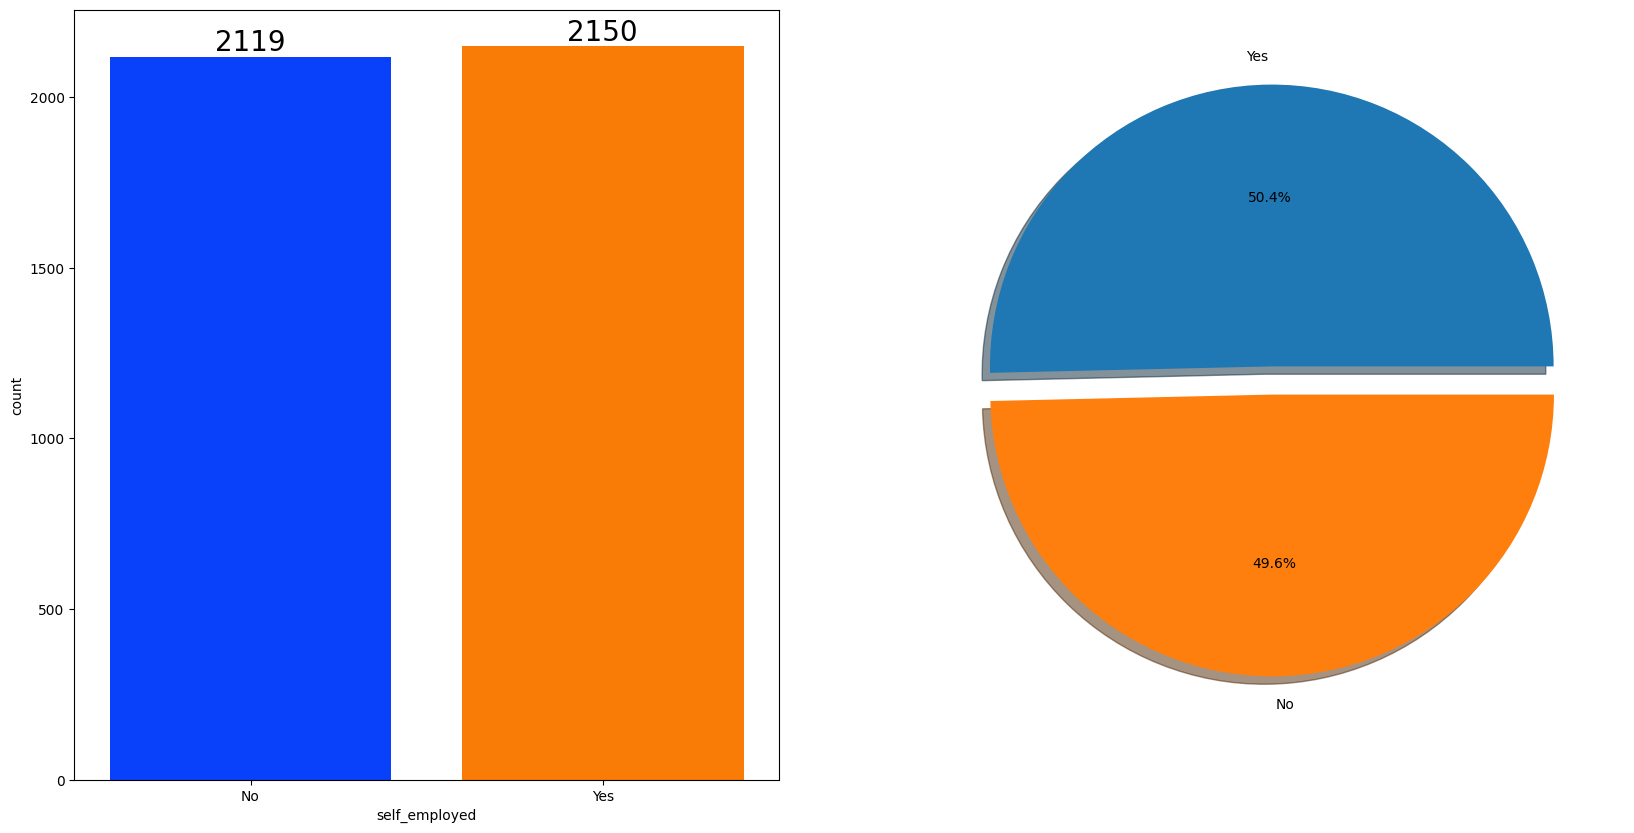

In [94]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['self_employed'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['self_employed'].value_counts(),labels=df['self_employed'].value_counts().index,explode=[0.1,0],autopct='%1.1f%%',shadow=True)
plt.show()

#### Insights 
- Equal distribution about 49.6% No and 50.4% Yes

#### 4.4.21 Number of Dependents status
- How is Group wise distribution ?
- Is Number of Dependents status has any impact on loan approval performance ?

#### UNIVARIATE ANALYSIS ( How is Group wise distribution ?)

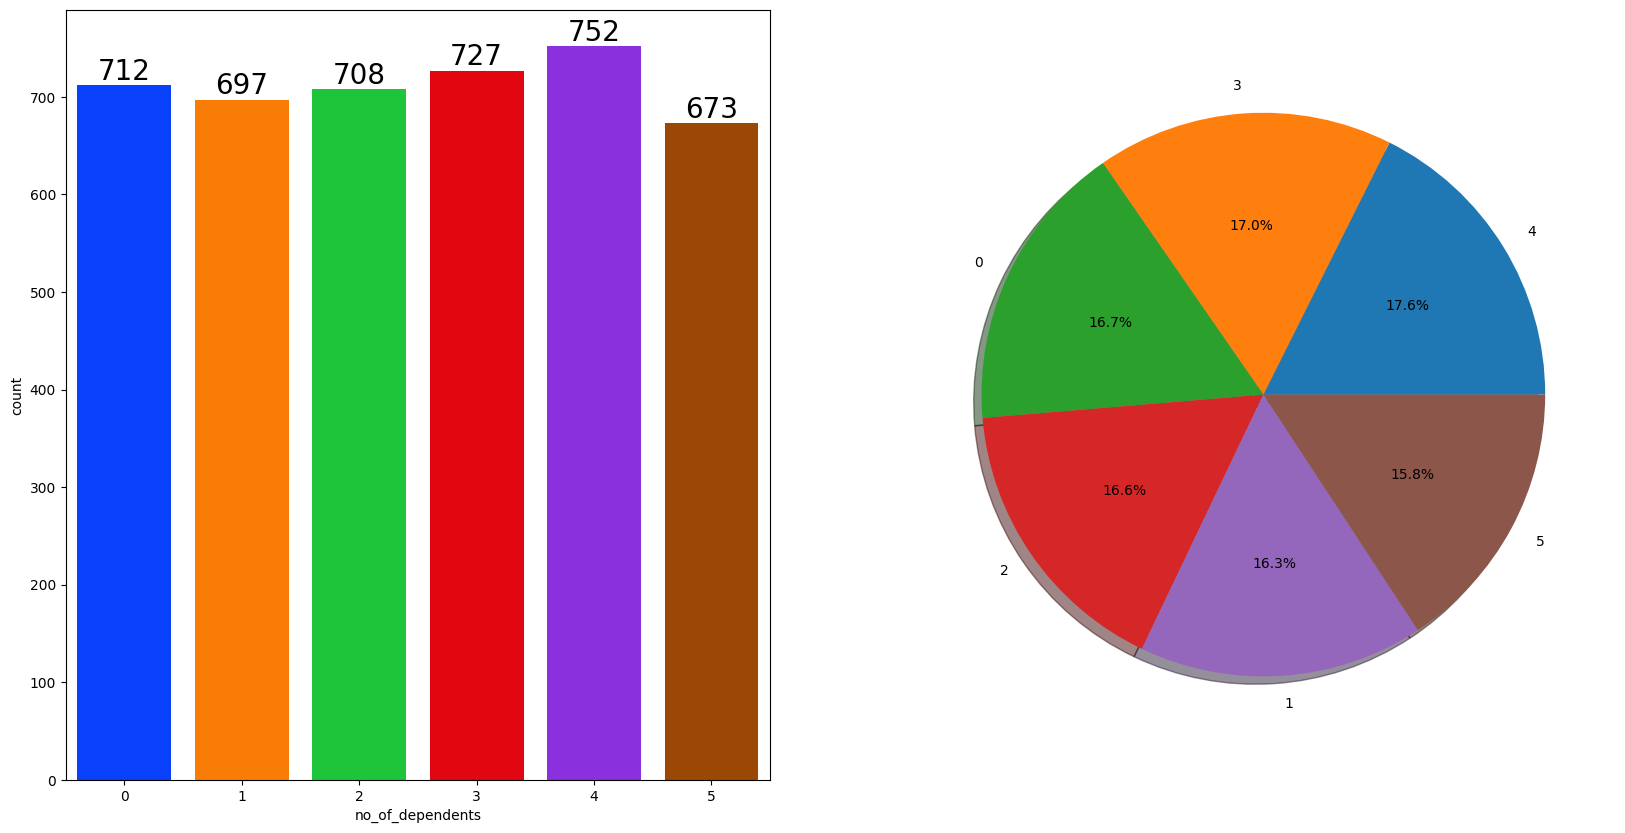

In [95]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['no_of_dependents'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['no_of_dependents'].value_counts(),labels=df['no_of_dependents'].value_counts().index,
        autopct='%1.1f%%',shadow=True)
plt.show()

#### Insights 
- Equal distribution about 16-17% distribution

#### 4.4.22 Credit Score Categories status
- How is Group wise distribution ?
- Is Credit Score Categories status has any impact on loan approval performance ?

#### UNIVARIATE ANALYSIS ( How is Group wise distribution ?)

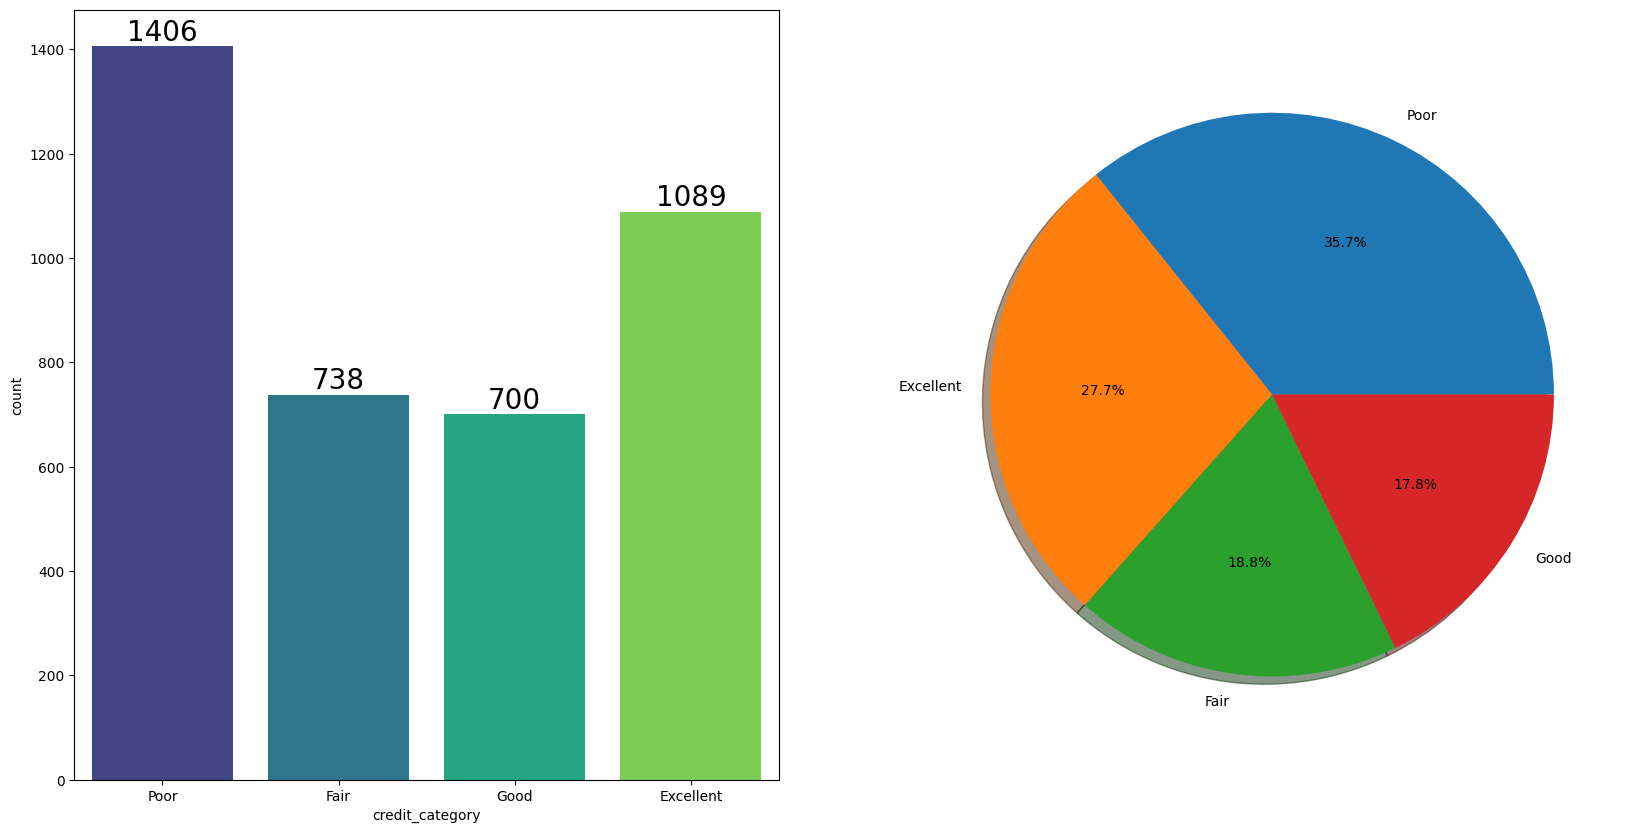

In [96]:
# Create credit score categories
df['credit_category'] = pd.cut(df['cibil_score'], bins=[0, 500, 600, 700, 850], 
                               labels=['Poor', 'Fair', 'Good', 'Excellent'])

f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['credit_category'],data=df,palette = 'viridis',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['credit_category'].value_counts(),labels=df['credit_category'].value_counts().index,
        autopct='%1.1f%%',shadow=True)
plt.show()

#### Insights 
- Highest distribution between Excellent and poor
- Lowest is to Good.

#### 4.4.23 Loan status
- How is Group wise distribution ?
- Is Loan status has any impact on loan approval performance ?

#### UNIVARIATE ANALYSIS ( How is Group wise distribution ?)

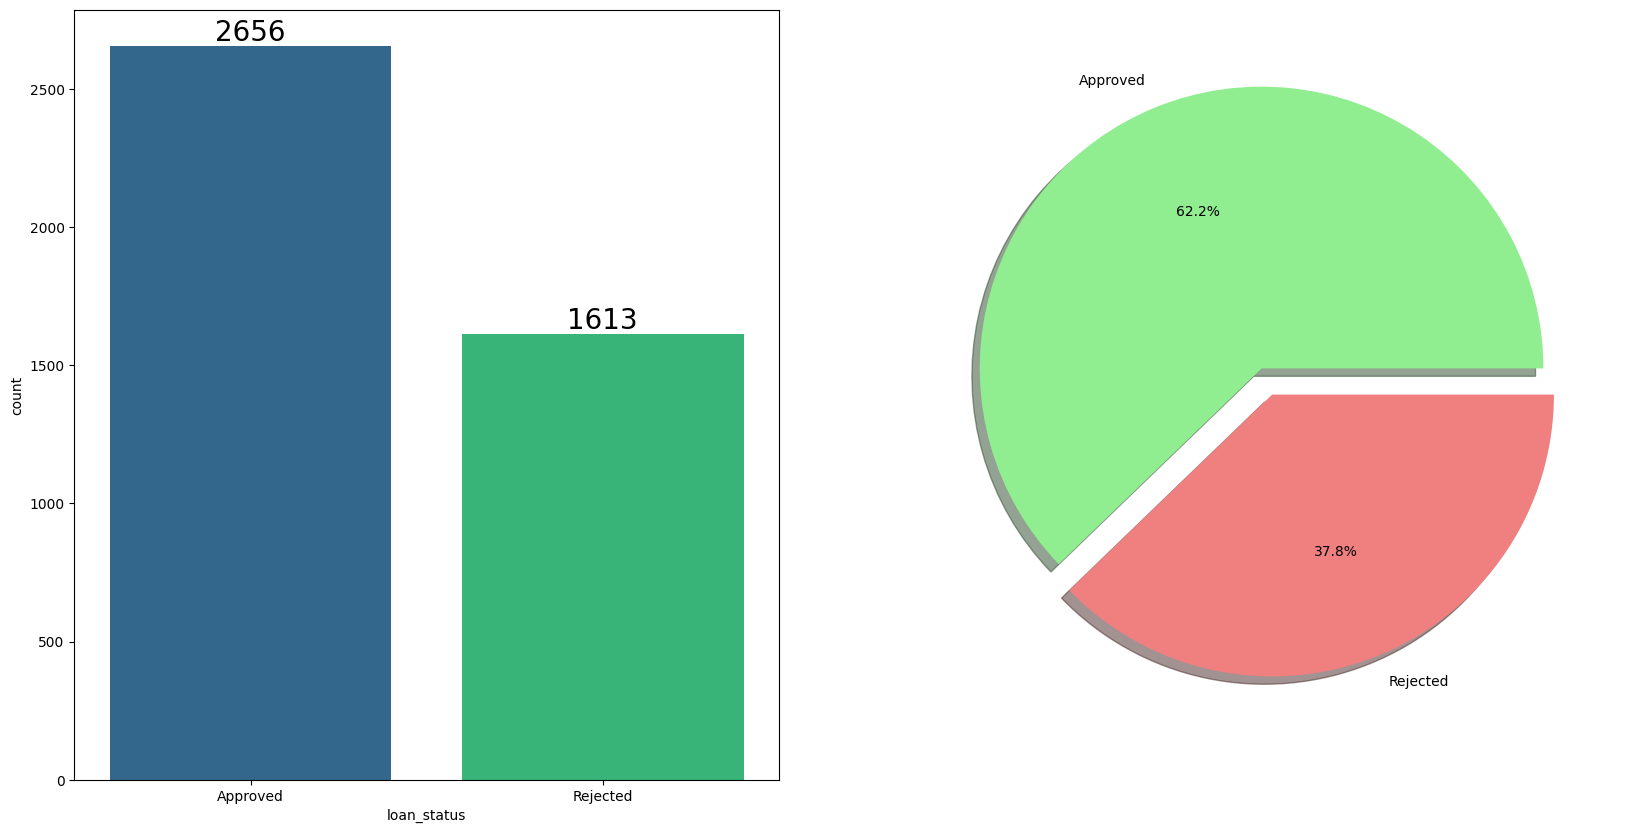

In [97]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['loan_status'],data=df,palette = 'viridis',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['loan_status'].value_counts(),labels=df['loan_status'].value_counts().index,
        explode=[0.1,0],autopct='%1.1f%%',shadow=True,colors=['lightgreen','lightcoral'])
plt.show()

#### Insights 
- Highest distribution approved which is 62.2%

#### BIVARIATE ANALYSIS ( Is Education factor influenses on loan approval?)

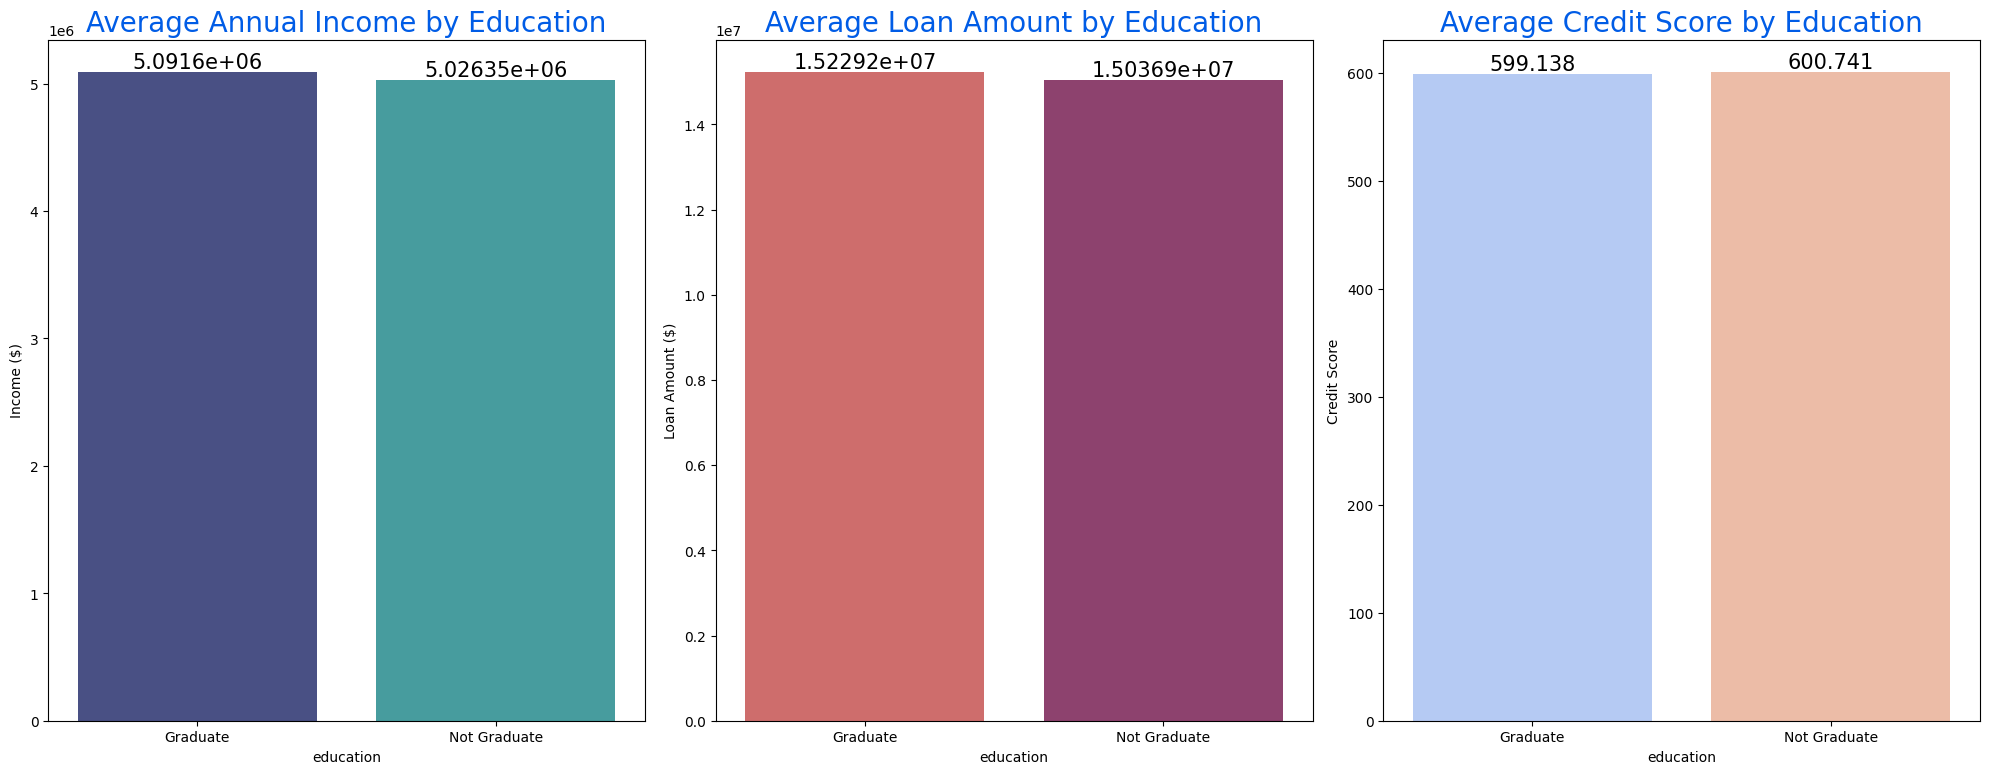

In [98]:
Group_data2 = df.groupby('education')
f,ax = plt.subplots(1,3,figsize=(20,8))

# Income Analysis
sns.barplot(x=Group_data2['income_annum'].mean().index, y=Group_data2['income_annum'].mean().values, 
            palette='mako', ax=ax[0])
ax[0].set_title('Average Annual Income by Education', color='#005ce6', size=20)
ax[0].set_ylabel('Income ($)')
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=15)

# Loan Amount Analysis
sns.barplot(x=Group_data2['loan_amount'].mean().index, y=Group_data2['loan_amount'].mean().values, 
            palette='flare', ax=ax[1])
ax[1].set_title('Average Loan Amount by Education', color='#005ce6', size=20)
ax[1].set_ylabel('Loan Amount ($)')
for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=15)

# Credit Score Analysis
sns.barplot(x=Group_data2['cibil_score'].mean().index, y=Group_data2['cibil_score'].mean().values, 
            palette='coolwarm', ax=ax[2])
ax[2].set_title('Average Credit Score by Education', color='#005ce6', size=20)
ax[2].set_ylabel('Credit Score')
for container in ax[2].containers:
    ax[2].bar_label(container, color='black', size=15)

plt.tight_layout()
plt.show()

#### Insights 
- Equal distribution for all the three

#### 4.4.3 PARENTAL LEVEL OF EDUCATION COLUMN
- Is Credit Category causes into loan approval? 

#### UNIVARIATE ANALYSIS ( Is Credit Category causes into loan approval? )

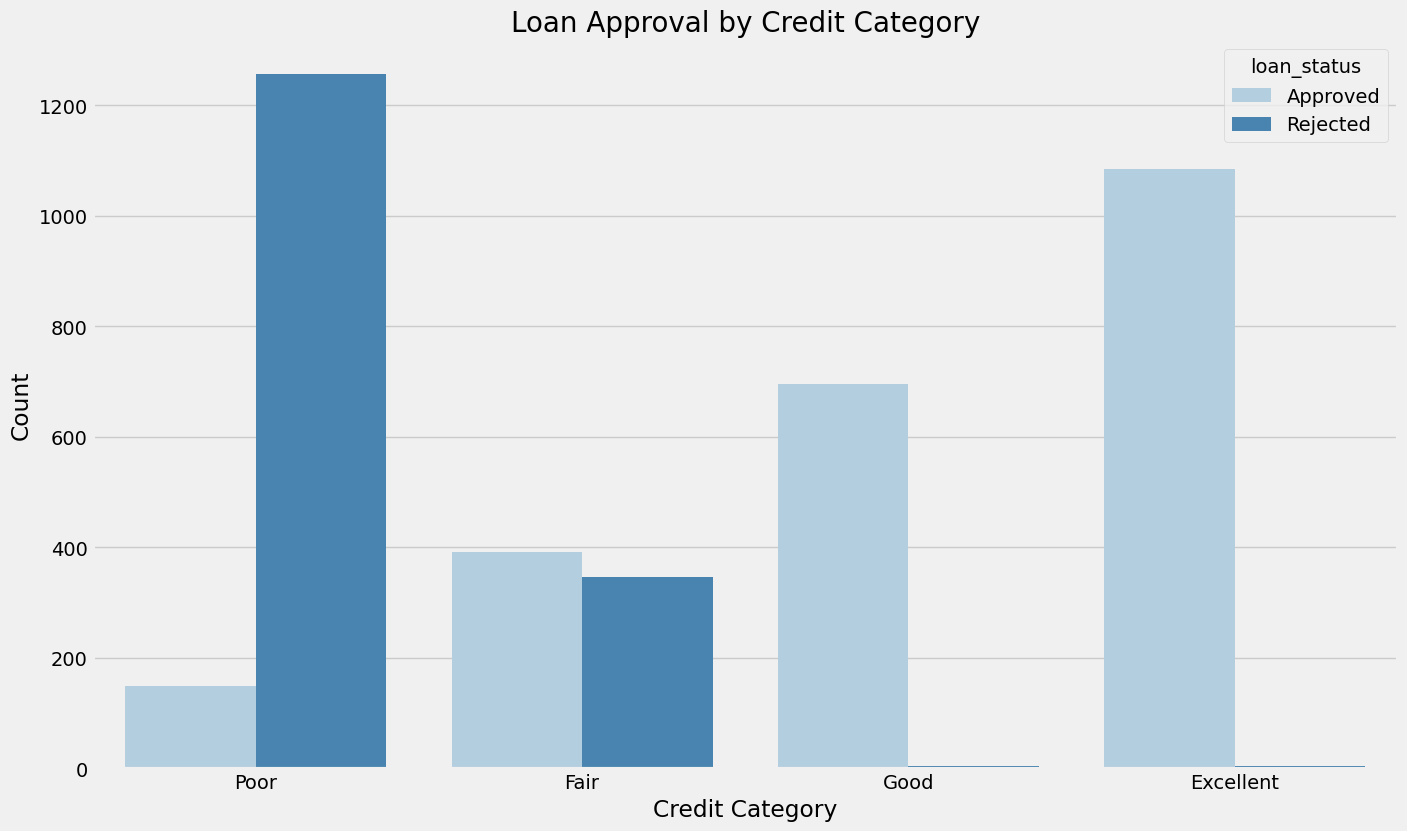

In [100]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(data=df, x='credit_category', hue='loan_status', palette = 'Blues')
plt.title('Loan Approval by Credit Category', fontweight = 30, fontsize = 20)
plt.xlabel('Credit Category')
plt.ylabel('Count')
plt.show()

#### Insights 
- Largest number of approval to poor

#### BIVARIATE ANALYSIS ( Is asset has any impact on Loan approval? )

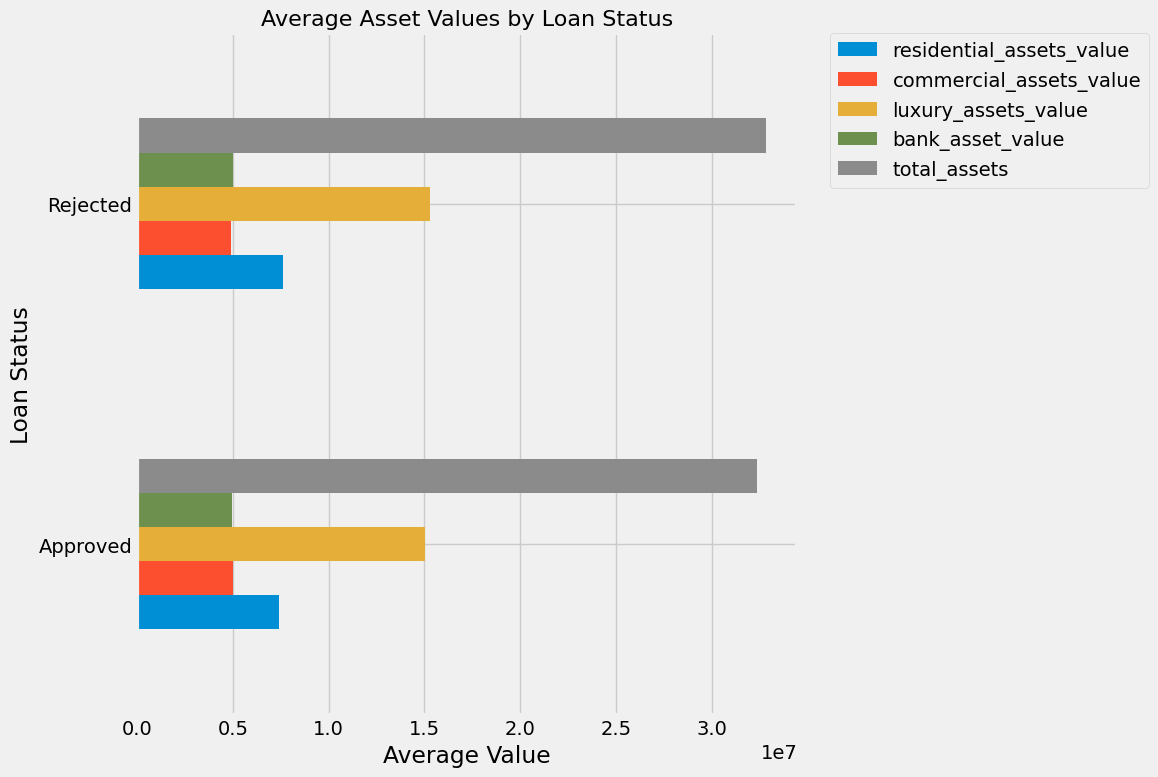

In [101]:
# Calculate mean values of different asset types by loan status
asset_means = df.groupby('loan_status').mean(numeric_only=True)[[
    'residential_assets_value', 
    'commercial_assets_value', 
    'luxury_assets_value', 
    'bank_asset_value',
    'total_assets'
]]

# Create the horizontal bar chart
asset_means.plot(kind='barh', figsize=(12, 8))
plt.title('Average Asset Values by Loan Status', fontsize=16)
plt.xlabel('Average Value')
plt.ylabel('Loan Status')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.show()

#### Insights 
- Same value for both

#### 4.4.5 Loan amount COLUMN 
- Is there Loan amount influence on Loan Approval?

#### BIVARIATE ANALYSIS ( Is there Loan amount influence on Loan Approval? )

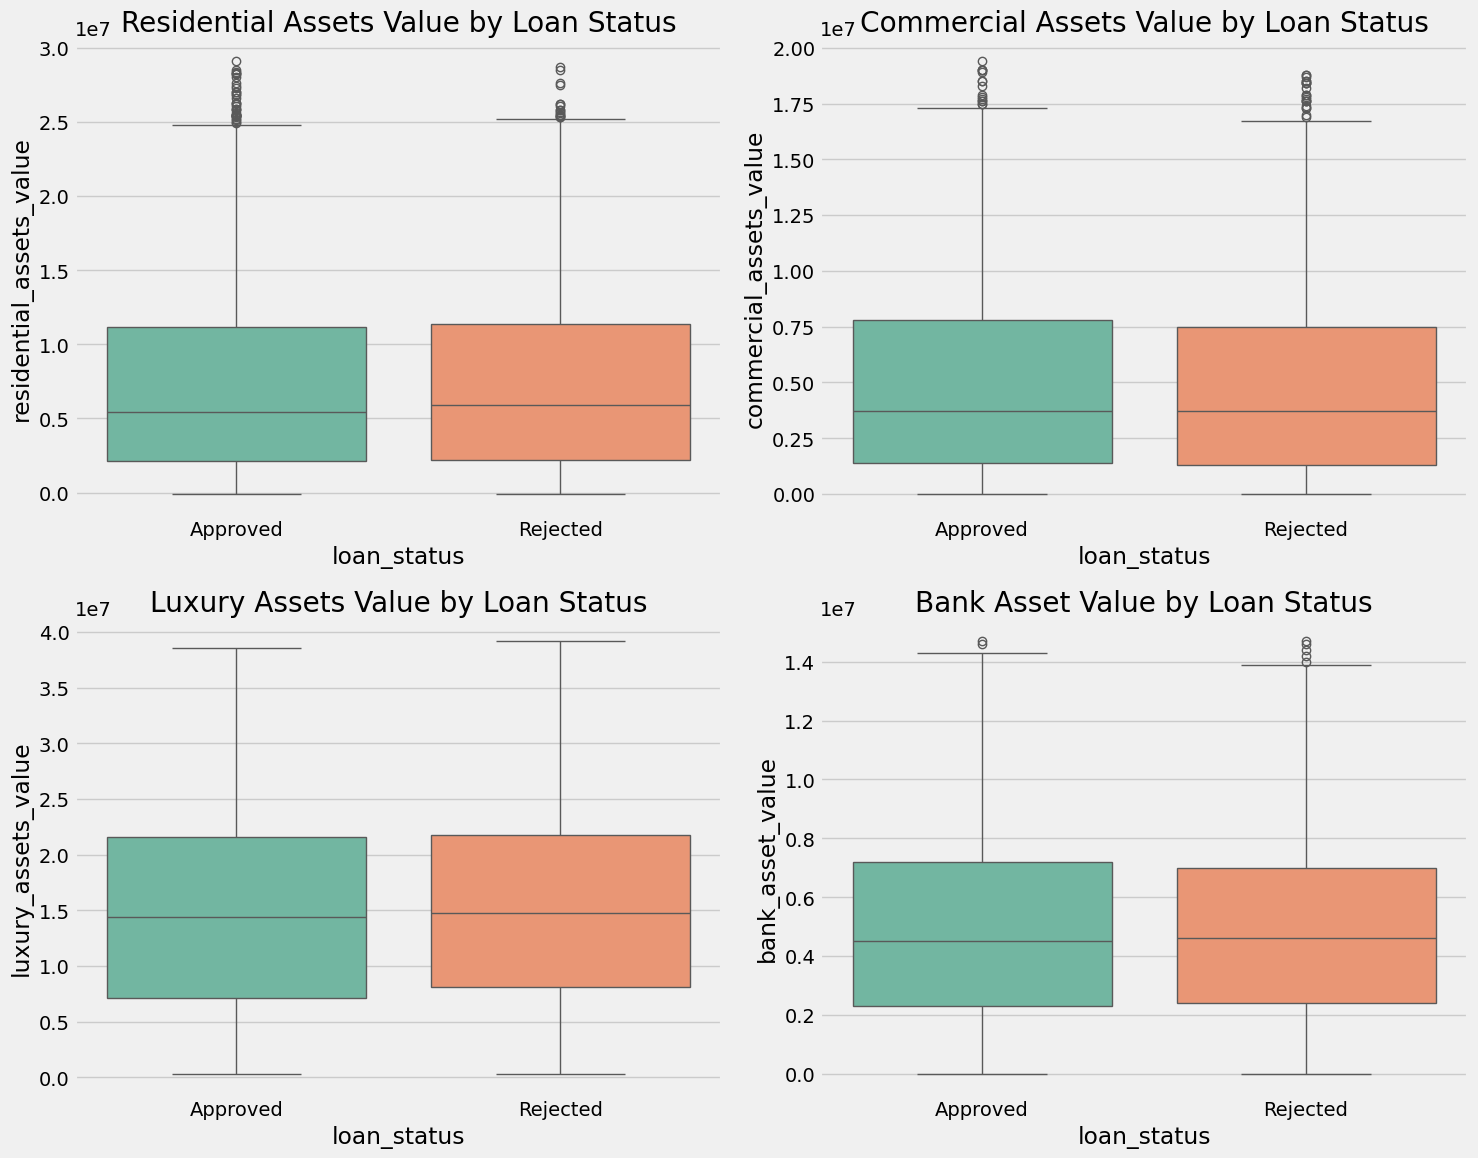

In [102]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

asset_columns = ['residential_assets_value', 'commercial_assets_value', 
                 'luxury_assets_value', 'bank_asset_value']

for i, asset in enumerate(asset_columns):
    row, col = i // 2, i % 2
    sns.boxplot(data=df, x='loan_status', y=asset, ax=axes[row, col], palette='Set2')
    axes[row, col].set_title(f'{asset.replace("_", " ").title()} by Loan Status')

plt.tight_layout()
plt.show()

#### Insights  
- Same status for the both

#### 4.4.6 CHECKING OUTLIERS

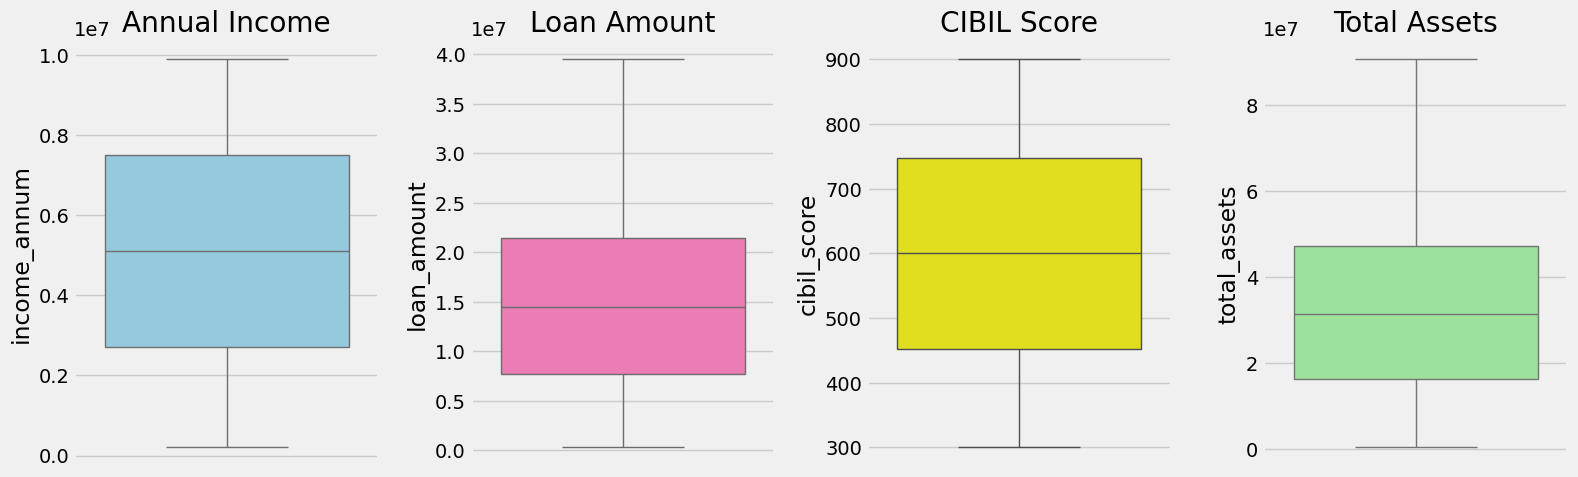

In [104]:
plt.subplots(1,4,figsize=(16,5))

plt.subplot(141)
sns.boxplot(y=df['income_annum'], color='skyblue')
plt.title('Annual Income')

plt.subplot(142)
sns.boxplot(y=df['loan_amount'], color='hotpink')
plt.title('Loan Amount')

plt.subplot(143)
sns.boxplot(y=df['cibil_score'], color='yellow')
plt.title('CIBIL Score')

plt.subplot(144)
sns.boxplot(y=df['total_assets'], color='lightgreen')
plt.title('Total Assets')

plt.tight_layout()
plt.show()

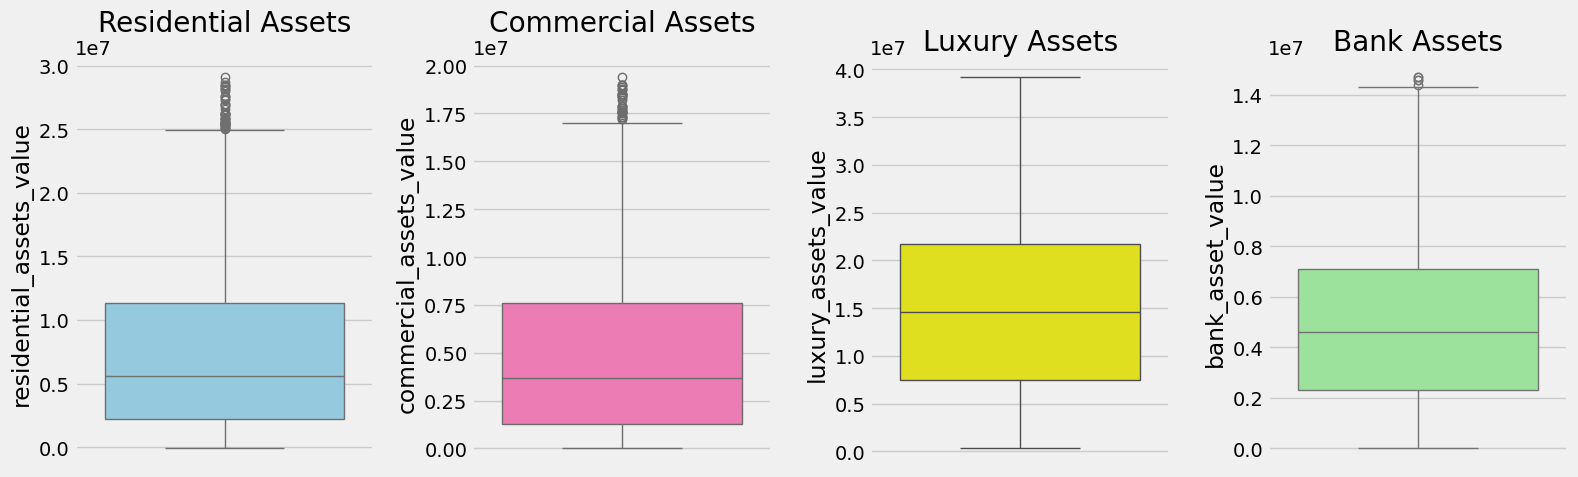

In [105]:
plt.subplots(1,4,figsize=(16,5))

plt.subplot(141)
sns.boxplot(y=df['residential_assets_value'], color='skyblue')
plt.title('Residential Assets')

plt.subplot(142)
sns.boxplot(y=df['commercial_assets_value'], color='hotpink')
plt.title('Commercial Assets')

plt.subplot(143)
sns.boxplot(y=df['luxury_assets_value'], color='yellow')
plt.title('Luxury Assets')

plt.subplot(144)
sns.boxplot(y=df['bank_asset_value'], color='lightgreen')
plt.title('Bank Assets')

plt.tight_layout()
plt.show()

#### 4.4.7 MUTIVARIATE ANALYSIS USING PAIRPLOT

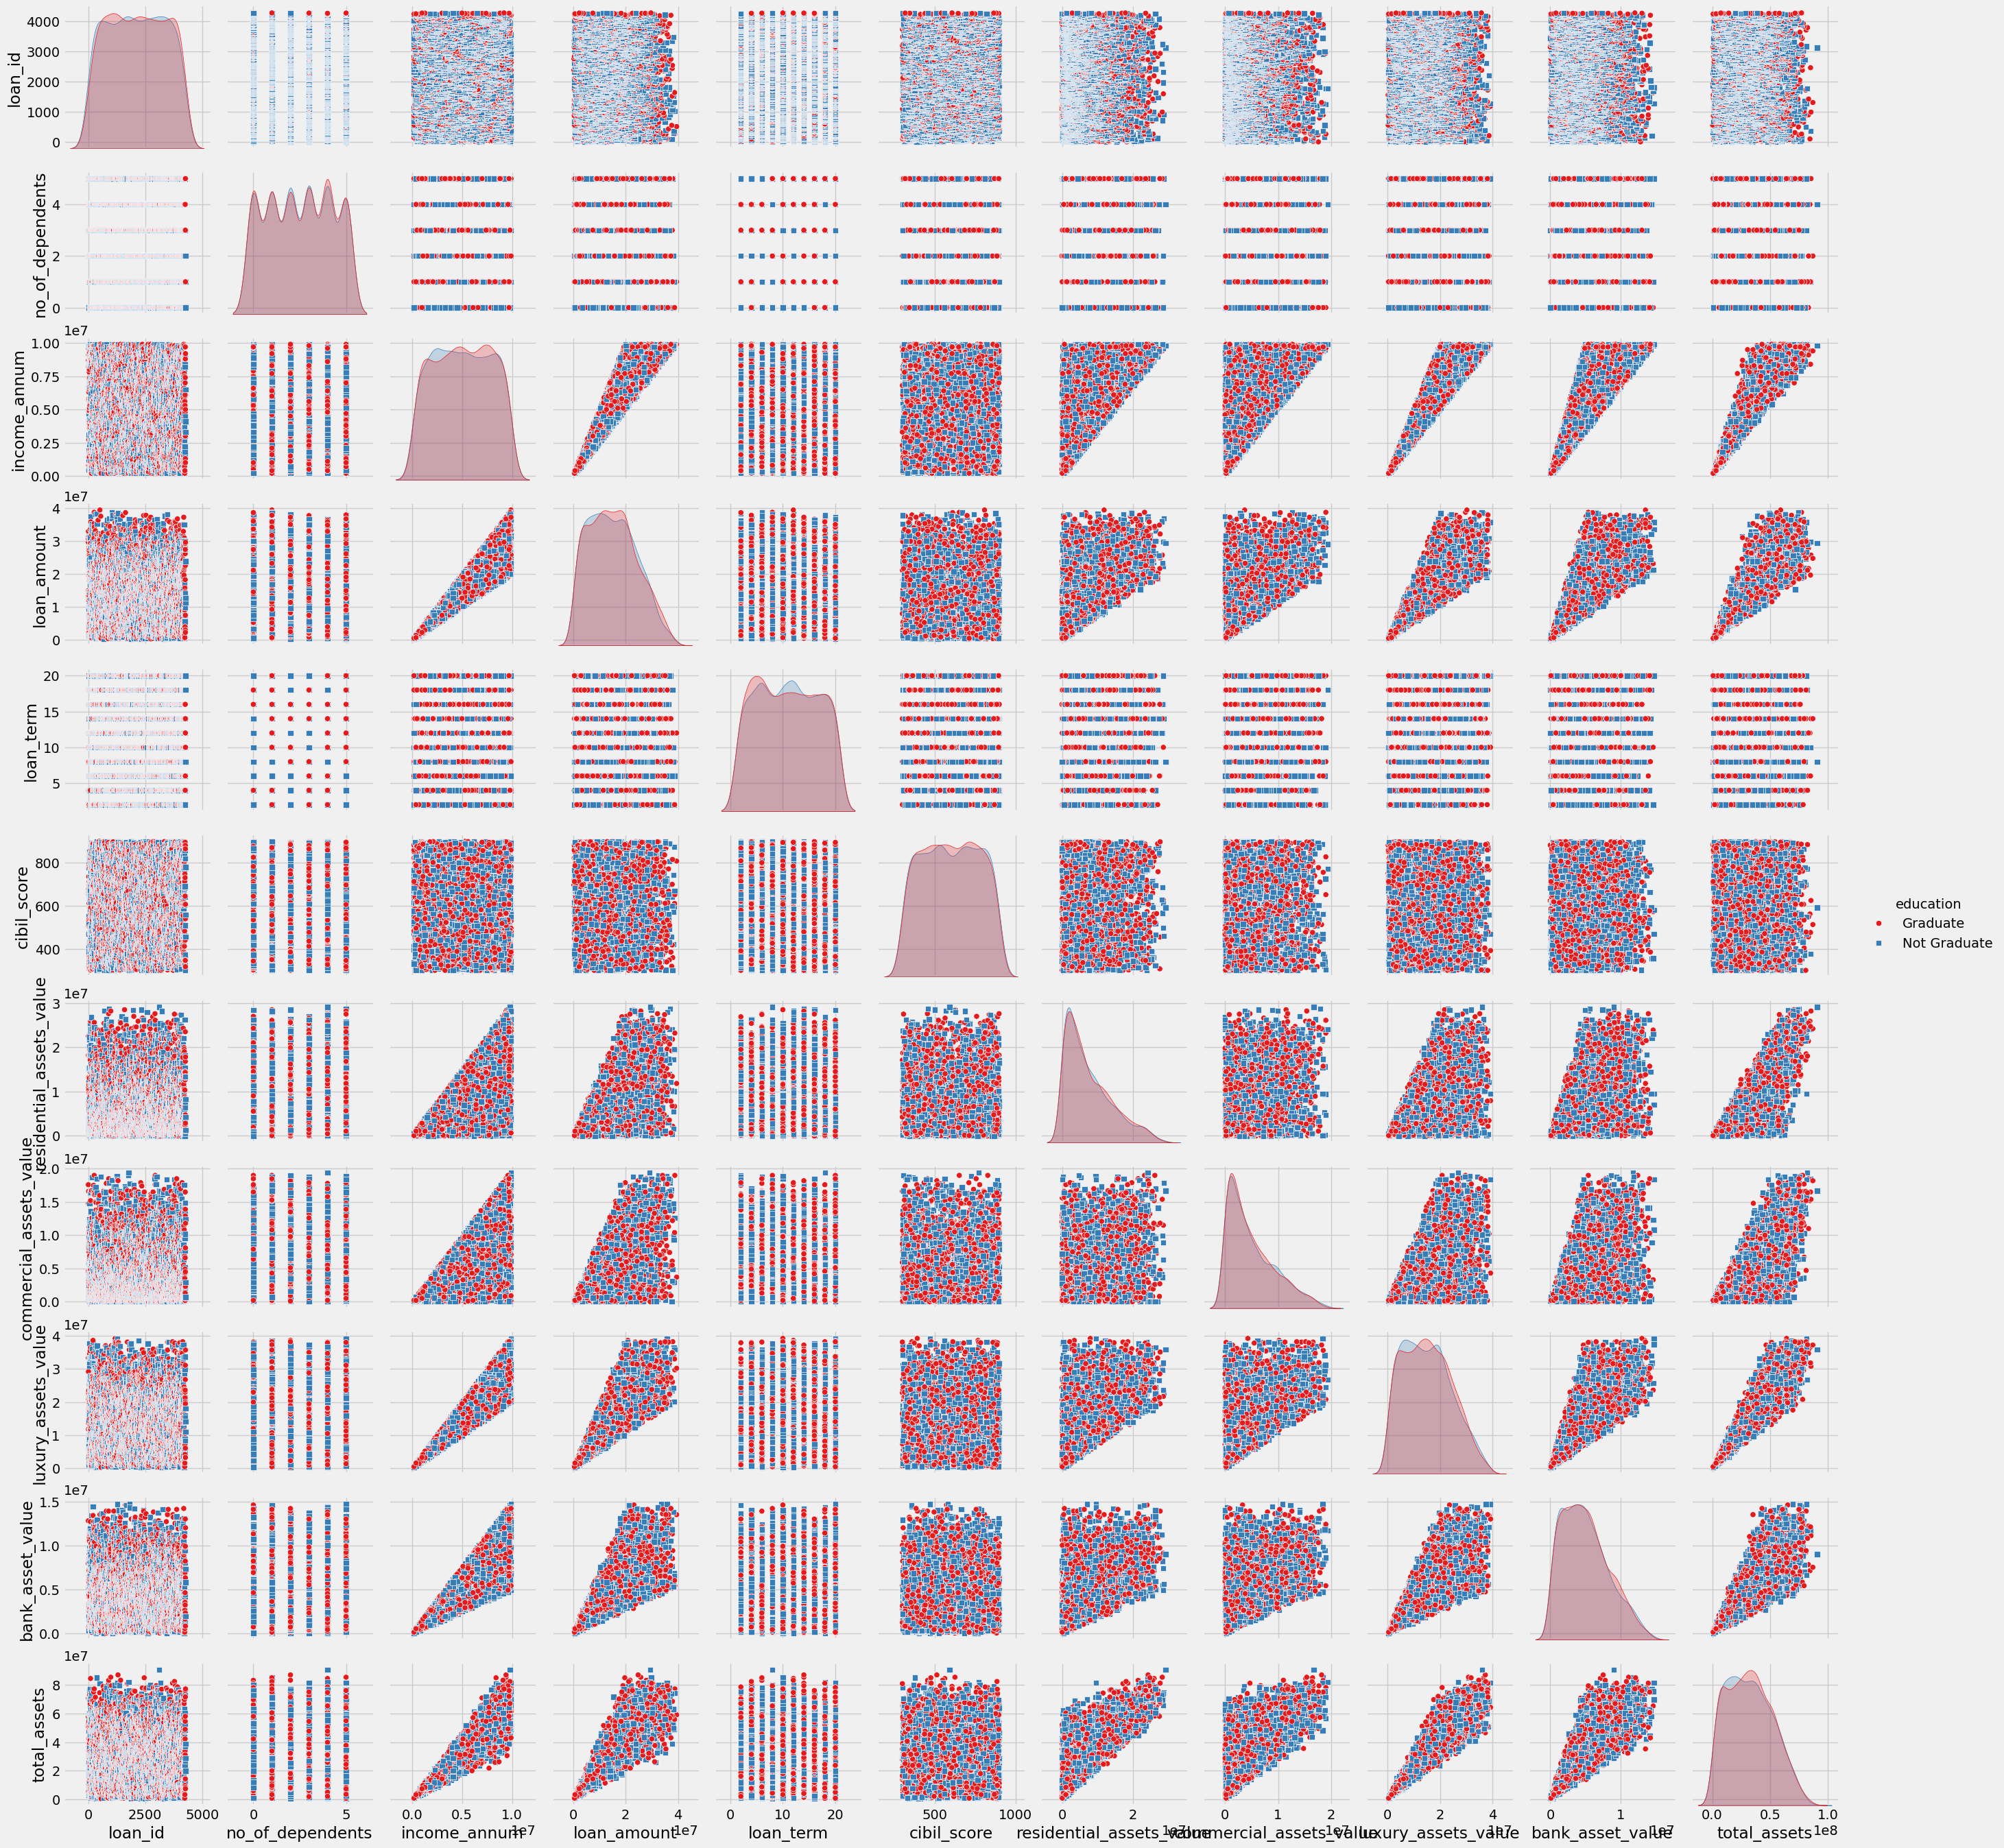

In [106]:
sns.pairplot(df,hue = 'education',palette='Set1',diag_kind='kde',markers=['o','s'])
plt.show()

#### Insights
- From the above plot it is clear that all the approval increase linearly with each other.

### 5. Conclusions
1. Primary Drivers of Loan Approval
- Credit Score (CIBIL Score) is the strongest predictor - Applicants with excellent credit scores (700+) have significantly higher approval rates
- Total Assets play a crucial role - Higher asset values strongly correlate with loan approval, serving as collateral security
- Income stability matters - While income alone isn't decisive, it contributes to debt servicing capacity

2. Demographic Factors with Limited Impact
- Education level has minimal direct influence - Graduates and non-graduates show similar approval patterns when other factors are equal
- Self-employment status shows mixed results - Both employed and self-employed applicants can get approved with strong financial profiles
- Number of dependents has moderate impact - More dependents may slightly reduce approval chances due to higher financial obligations

3. Key Risk Indicators
- Low credit scores (below 500) are the primary reason for rejections
- Insufficient assets relative to loan amount increases rejection risk
- High loan-to-income ratios negatively impact approval chances

4. Asset Composition Insights
- Diversified assets perform better - Applicants with balanced assets across residential, commercial, luxury, and bank categories have higher approval rates
- Luxury assets alone are insufficient - While valuable, they need to be complemented by other asset types and income stability

5. Approval Patterns
- 62.2% approval rate indicates relatively conservative lending practices
- Credit categories show clear patterns: Excellent → High approval, Poor → High rejection
- Asset thresholds exist - Applications below certain asset values face higher scrutiny

6. Business Implications
- Automated scoring should prioritize credit score, total assets, and income verification
- Gradual approval process could be implemented for borderline cases with medium credit scores
- Asset-backed lending appears to be a significant factor in the current approval framework

7. Unexpected Findings
- Some applicants with high assets but poor credit still get rejected, emphasizing the importance of credit history
- Income disparity between graduates and non-graduates is smaller than expected
- Loan amount requests are surprisingly consistent across education levels

**Recommendations for Loan Applicants:** 
- Maintain excellent credit history (CIBIL score above 700)
- Build diversified asset portfolio across different categories
- Ensure loan amount is proportionate to income and assets
- Consider credit improvement before applying for large loans